In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ATLAS = "AAL+CSF"
workdir = "../braintypicality/workdir/cuda_opt/learnable"
region_scores_raw = pd.read_csv(f"{workdir}/eval/heatmaps_v2/roi/{ATLAS}_roi_likelihoods_abcd_ibis_conte.csv")

In [3]:
region_scores_raw["Cohort"].value_counts()

Cohort
CONTE              444
ABCD-Val-Test      330
ABCD-ASD           161
IBIS-HR-Typical    106
IBIS-LR-Typical     82
IBIS-ASD            65
IBIS-Atypical       38
IBIS-DS             28
Name: count, dtype: int64

In [ ]:
# Load the CSV file back into a DataFrame. mri_info_manufacturersmn
merged_abcd_inlier = pd.read_csv(f"batches/batches_abcd_inlier_cols_scanner_model_sex.csv")

# new column by concatenating the two existing columns 
merged_abcd_inlier['mri_info_manufacturer_model'] = (
    merged_abcd_inlier['mri_info_manufacturer'].astype(str) +
    " | " +
    merged_abcd_inlier['mri_info_manufacturersmn'].astype(str)
)

# Create a dictionary mapping "src_subject_id" to "mri_info_manufacturer".
abcd_inlier_scanner_dict = merged_abcd_inlier.set_index("src_subject_id")["mri_info_manufacturer_model"].to_dict()

# Create a dictionary mapping "src_subject_id" to "demo_sex_v2".
abcd_inlier_sex_dict = merged_abcd_inlier.set_index("src_subject_id")["demo_sex_v2"].to_dict()

In [ ]:
# Load the CSV file back into a DataFrame. mri_info_manufacturersmn
merged_abcd_asd = pd.read_csv(f"batches/batches_abcd_asd_cols_scanner_model_sex.csv")

# new column by concatenating the two existing columns 
merged_abcd_asd['mri_info_manufacturer_model'] = (
    merged_abcd_asd['mri_info_manufacturer'].astype(str) +
    " | " +
    merged_abcd_asd['mri_info_manufacturersmn'].astype(str)
)

# Create a dictionary mapping "src_subject_id" to "mri_info_manufacturer".
abcd_asd_scanner_dict = merged_abcd_asd.set_index("src_subject_id")["mri_info_manufacturer_model"].to_dict()

# Create a dictionary mapping "src_subject_id" to "demo_sex_v2".
abcd_asd_sex_dict = merged_abcd_asd.set_index("src_subject_id")["demo_sex_v2"].to_dict()

In [7]:
for d in (abcd_inlier_scanner_dict, abcd_asd_scanner_dict):
    for uid, scanner in d.items():
        if scanner == 'SIEMENS | Prisma_fit':
            d[uid] = 'SIEMENS | Prisma'

In [8]:
set(abcd_inlier_scanner_dict.values())

{'GE MEDICAL SYSTEMS | DISCOVERY MR750',
 'Philips Medical Systems | Achieva dStream',
 'Philips Medical Systems | Ingenia',
 'SIEMENS | Prisma'}

In [9]:
set(abcd_asd_scanner_dict.values())

{'GE MEDICAL SYSTEMS | DISCOVERY MR750',
 'Philips Medical Systems | Achieva dStream',
 'Philips Medical Systems | Ingenia',
 'SIEMENS | Prisma'}

In [10]:
len(set(abcd_asd_scanner_dict.keys())), len(set(abcd_inlier_scanner_dict.keys()))

(161, 252)

In [11]:
region_scores_raw

background       CSF  Precentral_L  Precentral_R  Frontal_Sup_L  \
0      -1.422007  4.830999    -23.555390    -20.086775     -16.247343   
1      -1.766318  1.943377    -31.462437    -28.461182     -22.781567   
2      -2.024690  1.130348    -35.057358    -34.403280     -28.831656   
3      -1.728039  2.138655    -27.539470    -24.798237     -20.976292   
4      -1.834558  0.978848    -32.569042    -29.899424     -21.127417   
...          ...       ...           ...           ...            ...   
1249   -1.886273  4.017753    -27.940348    -20.945522     -18.982530   
1250   -1.706495  6.366811    -24.596453    -21.023167     -14.086297   
1251   -1.620624  5.722932    -22.538738    -18.570286     -13.812684   
1252   -1.253246  4.566100    -23.394064    -22.984125     -14.441563   
1253   -1.650913  2.473053    -27.979412    -26.869295     -18.771877   

      Frontal_Sup_R  Frontal_Sup_Orb_L  Frontal_Sup_Orb_R  Frontal_Mid_L  \
0        -18.548300          -6.266200          -4.754341     -18.378649   
1        -21.791424          -7.553915          -3.513864     -23.860710   
2        -30.631514         -14.570530         -15.664550     -29.978966   
3        -21.410181         -11.197124         -11.296744     -21.926720   
4        -22.612606         -12.860826          -8.167071     -24.496920   
...             ...                ...                ...            ...   
1249     -18.101128          -9.346893          -6.576459     -20.590385   
1250     -14.985574          -0.453326          -0.409442     -17.309107   
1251     -12.957525          -3.620485          -1.474109     -14.926986   
1252     -15.694534          -9.741678          -9.982136     -18.166548   
1253     -22.774910         -10.057180         -11.526320     -23.394075   

      Frontal_Mid_R  ...  Vermis_1_2   Vermis_3  Vermis_4_5   Vermis_6  \
0        -17.228788  ...   -6.936377 -13.489110  -15.838533 -18.108269   
1        -19.677948  ...   -6.238552 -14.686870  -24.194677 -25.412760   
2        -31.325285  ...   -8.414022 -12.936183  -25.081600 -27.785666   
3        -22.158188  ...   -4.416653 -15.307685  -18.758650 -19.460728   
4        -23.096933  ...  -10.908650  -9.540483  -19.147150 -21.749165   
...             ...  ...         ...        ...         ...        ...   
1249     -17.368742  ...  -18.902336 -16.078297  -26.226242 -30.992746   
1250     -13.246016  ...  -15.825355 -20.386630  -28.736244 -29.243793   
1251     -11.569885  ...   -6.749814 -20.180265  -23.870605 -33.075462   
1252     -20.657309  ...    4.645748   1.281920  -14.781827 -26.991018   
1253     -22.871080  ...  -10.741505  -8.425344  -23.293493 -27.103014   

       Vermis_7   Vermis_8   Vermis_9  Vermis_10   Cohort              ID  
0    -21.633880 -15.332696 -15.847605   8.213509  IBIS-DS      IBIS105477  
1    -27.861021 -26.733640 -21.062107   3.074937  IBIS-DS      IBIS110925  
2    -26.679392 -27.507065 -15.993563   5.869650  IBIS-DS      IBIS123451  
3    -30.154259 -31.711697 -23.194330   6.358972  IBIS-DS      IBIS146443  
4    -20.673717 -19.737808 -24.705618   4.163641  IBIS-DS      IBIS241887  
...         ...        ...        ...        ...      ...             ...  
1249 -30.139128 -31.493732 -27.026628  -0.157472    CONTE  TWINST0324-1-2  
1250 -31.722929 -25.728933 -23.085327  -2.565598    CONTE  TWINST0325-1-1  
1251 -31.422821 -29.589190 -27.845144   3.057094    CONTE  TWINST0325-1-2  
1252 -22.216753 -18.988570 -17.450136   9.876166    CONTE  TWINST0326-1-1  
1253 -30.350946 -24.568836 -15.433511   0.704983    CONTE  TWINST0326-1-2  

[1254 rows x 120 columns]

In [12]:
# 1. Filter out the ABCD IDs by cohort
abcd_inlier_ids = region_scores_raw.loc[
    region_scores_raw['Cohort'] == 'ABCD-Val-Test', 'ID'
]
abcd_asd_ids = region_scores_raw.loc[
    region_scores_raw['Cohort'] == 'ABCD-ASD', 'ID'
]

In [13]:
len(abcd_inlier_ids), len(abcd_asd_ids)

(330, 161)

In [14]:
len(abcd_inlier_scanner_dict), len(abcd_asd_scanner_dict)

(252, 161)

In [15]:
#   abcd_inlier_ids            : iterable of all inlier IDs (e.g. identifiers_abcd)
#   abcd_asd_ids               : iterable of all ASD IDs     (e.g. identifiers_abcd_asd)
#   abcd_inlier_scanner_dict   : existing dict ID→scanner
#   abcd_asd_scanner_dict      : existing dict ID→scanner

# 1. Find which IDs are missing from each dict
missing_inlier = set(abcd_inlier_ids) - set(abcd_inlier_scanner_dict.keys())
missing_asd    = set(abcd_asd_ids)    - set(abcd_asd_scanner_dict.keys())

# 2. Add them with the default value "Connectome"
abcd_inlier_scanner_dict.update({uid: 'Connectome' for uid in missing_inlier})
abcd_asd_scanner_dict.update({uid: 'Connectome' for uid in missing_asd})

In [16]:
len(abcd_inlier_scanner_dict), len(abcd_asd_scanner_dict)

(330, 161)

In [17]:
# 1. Filter out the IBIS IDs by cohort
ibis_inlier_ids = region_scores_raw.loc[
    region_scores_raw['Cohort'] == 'IBIS-LR-Typical', 'ID'
]
ibis_asd_ids = region_scores_raw.loc[
    region_scores_raw['Cohort'] == 'IBIS-ASD', 'ID'
]

# 2. Build the two IBIS dictionaries
ibis_inlier_scanner_dict = {uid: 'IBIS' for uid in ibis_inlier_ids}
ibis_asd_scanner_dict    = {uid: 'IBIS' for uid in ibis_asd_ids}

# 3. Merge with the existing ABCD dicts
inlier_scanner_dict = {
    **abcd_inlier_scanner_dict,
    **ibis_inlier_scanner_dict
}
asd_scanner_dict = {
    **abcd_asd_scanner_dict,
    **ibis_asd_scanner_dict
}

# Now:
#   ibis_inlier_scanner_dict maps all IBIS-LR-Typical IDs → 'IBIS'
#   ibis_asd_scanner_dict    maps all IBIS-ASD IDs        → 'IBIS'
#   inlier_scanner_dict      is the union of both inlier dicts
#   asd_scanner_dict         is the union of both ASD dicts



In [48]:
set(inlier_scanner_dict.values())


{'Connectome',
 'GE MEDICAL SYSTEMS | DISCOVERY MR750',
 'IBIS',
 'Philips Medical Systems | Achieva dStream',
 'Philips Medical Systems | Ingenia',
 'SIEMENS | Prisma'}

In [19]:
# 1. CREATE INTEGER “BATCH” LABELS FROM SCANNER DICTS
inlier_ids = list(inlier_scanner_dict.keys())
asd_ids    = list(asd_scanner_dict.keys())

# pull out the raw scanner‐name strings
scanner_names_inlier = [inlier_scanner_dict[uid] for uid in inlier_ids]
scanner_names_asd    = [asd_scanner_dict[uid]   for uid in asd_ids]

# merge Prisma variants into one label
def label_name(name):
    if name in ('SIEMENS | Prisma', 'SIEMENS | Prisma_fit'):
        return 'SIEMENS | Prisma'
    return name

# build your integer mapping
all_names   = { label_name(n) for n in scanner_names_inlier + scanner_names_asd }
merged_names = sorted(all_names)                         # e.g. ['Connectome','IBIS','SIEMENS | Prisma', ...]
label_map    = {nm: i for i, nm in enumerate(merged_names, 1)}

# now turn each subject’s scanner into an integer
scanner_labels_inlier = [ label_map[label_name(n)] for n in scanner_names_inlier ]
scanner_labels_asd     = [ label_map[label_name(n)] for n in scanner_names_asd ]


In [36]:
# 2. SLICE OUT RAW REGION DATA  (everything except 'Cohort' & 'ID')

# find which columns are features
region_cols = [c for c in region_scores_raw.columns if c not in ('Cohort','ID')]

# 1. check which IDs repeat (optional)
vc = region_scores_raw['ID'].value_counts()
repeats = vc[vc > 1]
print("Repeated IDs:\n", repeats)

# 2. build df_inlier & df_asd with one row per ID, in the exact order of your ID lists

def make_unique_df(ids):
    df = (
        region_scores_raw
        # grab only the rows for these IDs
        .loc[region_scores_raw['ID'].isin(ids), ['ID','Cohort'] + region_cols]
        # drop any duplicate IDs, keeping the first occurrence
        .drop_duplicates(subset='ID', keep='first')
        # now set ID as index so we can re‐order to exactly match the `ids` list
        .set_index('ID')
        # reindex to force the same ordering as `ids`
        .loc[ids]
        # put ID back as a column
        .reset_index()
    )
    return df

df_inlier_unique = make_unique_df(inlier_ids)
df_asd_unique    = make_unique_df(asd_ids)

# sanity check
assert len(df_inlier_unique) == len(inlier_ids)
assert len(df_asd_unique)    == len(asd_ids)

# now extract your matrices
X_inlier = df_inlier_unique[region_cols].to_numpy()
X_asd    = df_asd_unique   [region_cols].to_numpy()

# now X_inlier and X_asd are the arrays you can feed into NeuroCombat (or any other model)

Repeated IDs:
 ID
IBIS792433         2
NDARINVD0KNT1VK    2
IBIS110925         2
NDARINVNHL7P38J    2
IBIS502237         2
IBIS688878         2
Name: count, dtype: int64


In [38]:
from neuroCombat import neuroCombat, neuroCombatFromTraining

# Specifying the batch (scanner variable) as well as a biological covariate to preserve:
covars = {'batch':scanner_labels_inlier} 
covars = pd.DataFrame(covars)  

# To specify the name of the variable that encodes for the scanner/batch covariate:
batch_col = 'batch'

#Harmonization step:
train_combat = neuroCombat(dat=X_inlier.T,
    covars=covars,
    batch_col=batch_col,
    eb=False)

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding L/S adjustments without Empirical Bayes
[neuroCombat] Final adjustment of data


In [39]:
harmonized_roi_likelihoods_inlier = train_combat["data"].T

In [40]:
fit_combat = neuroCombatFromTraining(dat=X_asd.T, batch=scanner_labels_asd, estimates=train_combat["estimates"])

[neuroCombatFromTraining] In development ...



In [41]:
harmonized_roi_likelihoods_asd = fit_combat["data"].T

In [43]:
harmonized_roi_likelihoods_inlier.shape, harmonized_roi_likelihoods_asd.shape

((412, 118), (226, 118))

In [ ]:
# harmonized_roi_likelihoods_inlier should be shape (len(inlier_ids), len(region_cols))
# harmonized_roi_likelihoods_asd     should be shape (len(asd_ids),    len(region_cols))

df_inlier_h = df_inlier_unique.copy()
df_inlier_h[region_cols] = pd.DataFrame(
    harmonized_roi_likelihoods_inlier,
    columns=region_cols,
    index=df_inlier_h.index
)

df_asd_h = df_asd_unique.copy()
df_asd_h[region_cols] = pd.DataFrame(
    harmonized_roi_likelihoods_asd,
    columns=region_cols,
    index=df_asd_h.index
)


# 4. COMBINE BACK INTO ONE “HARMONIZED” DATAFRAME

harmonized_df = pd.concat([df_inlier_h, df_asd_h], ignore_index=True)

# result: 
#   – harmonized_df[region_cols] are your NeuroCombat‐adjusted scores
#   – harmonized_df[['Cohort','ID']] are preserved from the original
#   – you also have scanner_labels_inlier / scanner_labels_asd ready to pass
#     as the “batch” variable when you retrain or predict.

In [46]:
harmonized_df

ID         Cohort  background       CSF  Precentral_L  \
0    NDARINV021403LF  ABCD-Val-Test   -2.104171 -2.954186    -29.332984   
1    NDARINV08P1JKNE  ABCD-Val-Test   -2.006675 -1.372853    -32.829118   
2    NDARINV0G37YGY1  ABCD-Val-Test   -2.284618 -5.160482    -35.072901   
3    NDARINV0PJ81CA5  ABCD-Val-Test   -2.141214  1.247407    -31.949473   
4    NDARINV0RB5CTN0  ABCD-Val-Test   -2.079600 -0.118985    -28.962505   
..               ...            ...         ...       ...           ...   
633       IBIS963992       IBIS-ASD   -2.195740 -0.155688    -32.763575   
634       IBIS973338       IBIS-ASD   -2.054512 -2.838045    -32.808835   
635       IBIS983222       IBIS-ASD   -2.075304 -0.545990    -25.604294   
636       IBIS988197       IBIS-ASD   -2.057526 -3.764876    -32.691296   
637       IBIS988903       IBIS-ASD   -2.253732 -1.197935    -32.631939   

     Precentral_R  Frontal_Sup_L  Frontal_Sup_R  Frontal_Sup_Orb_L  \
0      -27.898556     -25.346158     -26.956150         -16.187038   
1      -27.520811     -27.054880     -27.940954         -13.593393   
2      -37.237866     -33.126045     -32.943417         -16.685594   
3      -31.555368     -24.979466     -26.191999         -11.376076   
4      -31.134300     -22.982687     -28.044650         -15.010086   
..            ...            ...            ...                ...   
633    -35.184557     -27.817583     -32.031982         -15.458173   
634    -32.998616     -28.720984     -29.356281         -16.132766   
635    -31.619720     -21.619305     -27.013938         -13.749029   
636    -32.563528     -26.924933     -28.340613         -15.703164   
637    -33.046870     -32.374163     -33.429840         -20.886909   

     Frontal_Sup_Orb_R  ...  Cerebelum_10_L  Cerebelum_10_R  Vermis_1_2  \
0           -10.986978  ...       -6.786820       -0.887246   -9.722530   
1           -14.719596  ...       -3.559114       -3.124270    3.371573   
2           -19.518256  ...      -12.479022      -10.732650   -7.964063   
3            -7.352888  ...       -2.146921        4.579157  -13.948204   
4           -12.313850  ...       -5.042878        5.991369    8.064156   
..                 ...  ...             ...             ...         ...   
633         -18.166311  ...       -6.018603       -5.895896   -3.367579   
634         -18.158689  ...       -5.682176       -5.124463   -4.374039   
635         -14.225861  ...       -9.168507       -7.531242    2.042247   
636         -13.813684  ...       -1.994816       -8.528963   -2.364788   
637         -17.432424  ...       -8.053504       -5.635816   -1.520632   

      Vermis_3  Vermis_4_5   Vermis_6   Vermis_7   Vermis_8   Vermis_9  \
0   -13.900397  -27.710626 -26.228627 -23.773159 -18.137169 -27.013868   
1    -8.996423  -23.514521 -27.887992 -28.099426 -21.987700 -23.677731   
2   -11.697330  -20.640964 -21.811373 -25.474876 -26.477628 -18.202498   
3   -12.987013  -26.359364 -29.892909 -24.297210 -22.668499 -28.311645   
4   -10.420886  -21.564873 -25.131246 -29.916912 -24.675052 -22.746688   
..         ...         ...        ...        ...        ...        ...   
633  -5.084698  -19.448980 -23.000585 -19.023055 -25.877078 -22.189258   
634 -15.619940  -19.812720 -23.775685 -25.524782 -30.664541 -22.056992   
635 -10.319733  -20.190140 -27.860119 -30.597677 -25.979221 -11.897154   
636 -10.813031  -24.486118 -26.116983 -29.999959 -33.650925 -24.876721   
637  -6.479506  -23.800860 -30.194782 -26.336187 -19.937162 -13.850784   

     Vermis_10  
0    -3.331866  
1     4.657338  
2     8.485708  
3    -2.057116  
4     5.508682  
..         ...  
633   3.011190  
634   0.017001  
635  11.736912  
636   0.147869  
637   9.075974  

[638 rows x 120 columns]

## SAVE

In [ ]:
#harmonized_df.to_csv(f"{workdir}/eval/heatmaps_v2/roi/{ATLAS}_roi_harmonized_likelihoods_abcd_ibis_conte.csv", index=False)

Regions 1–10


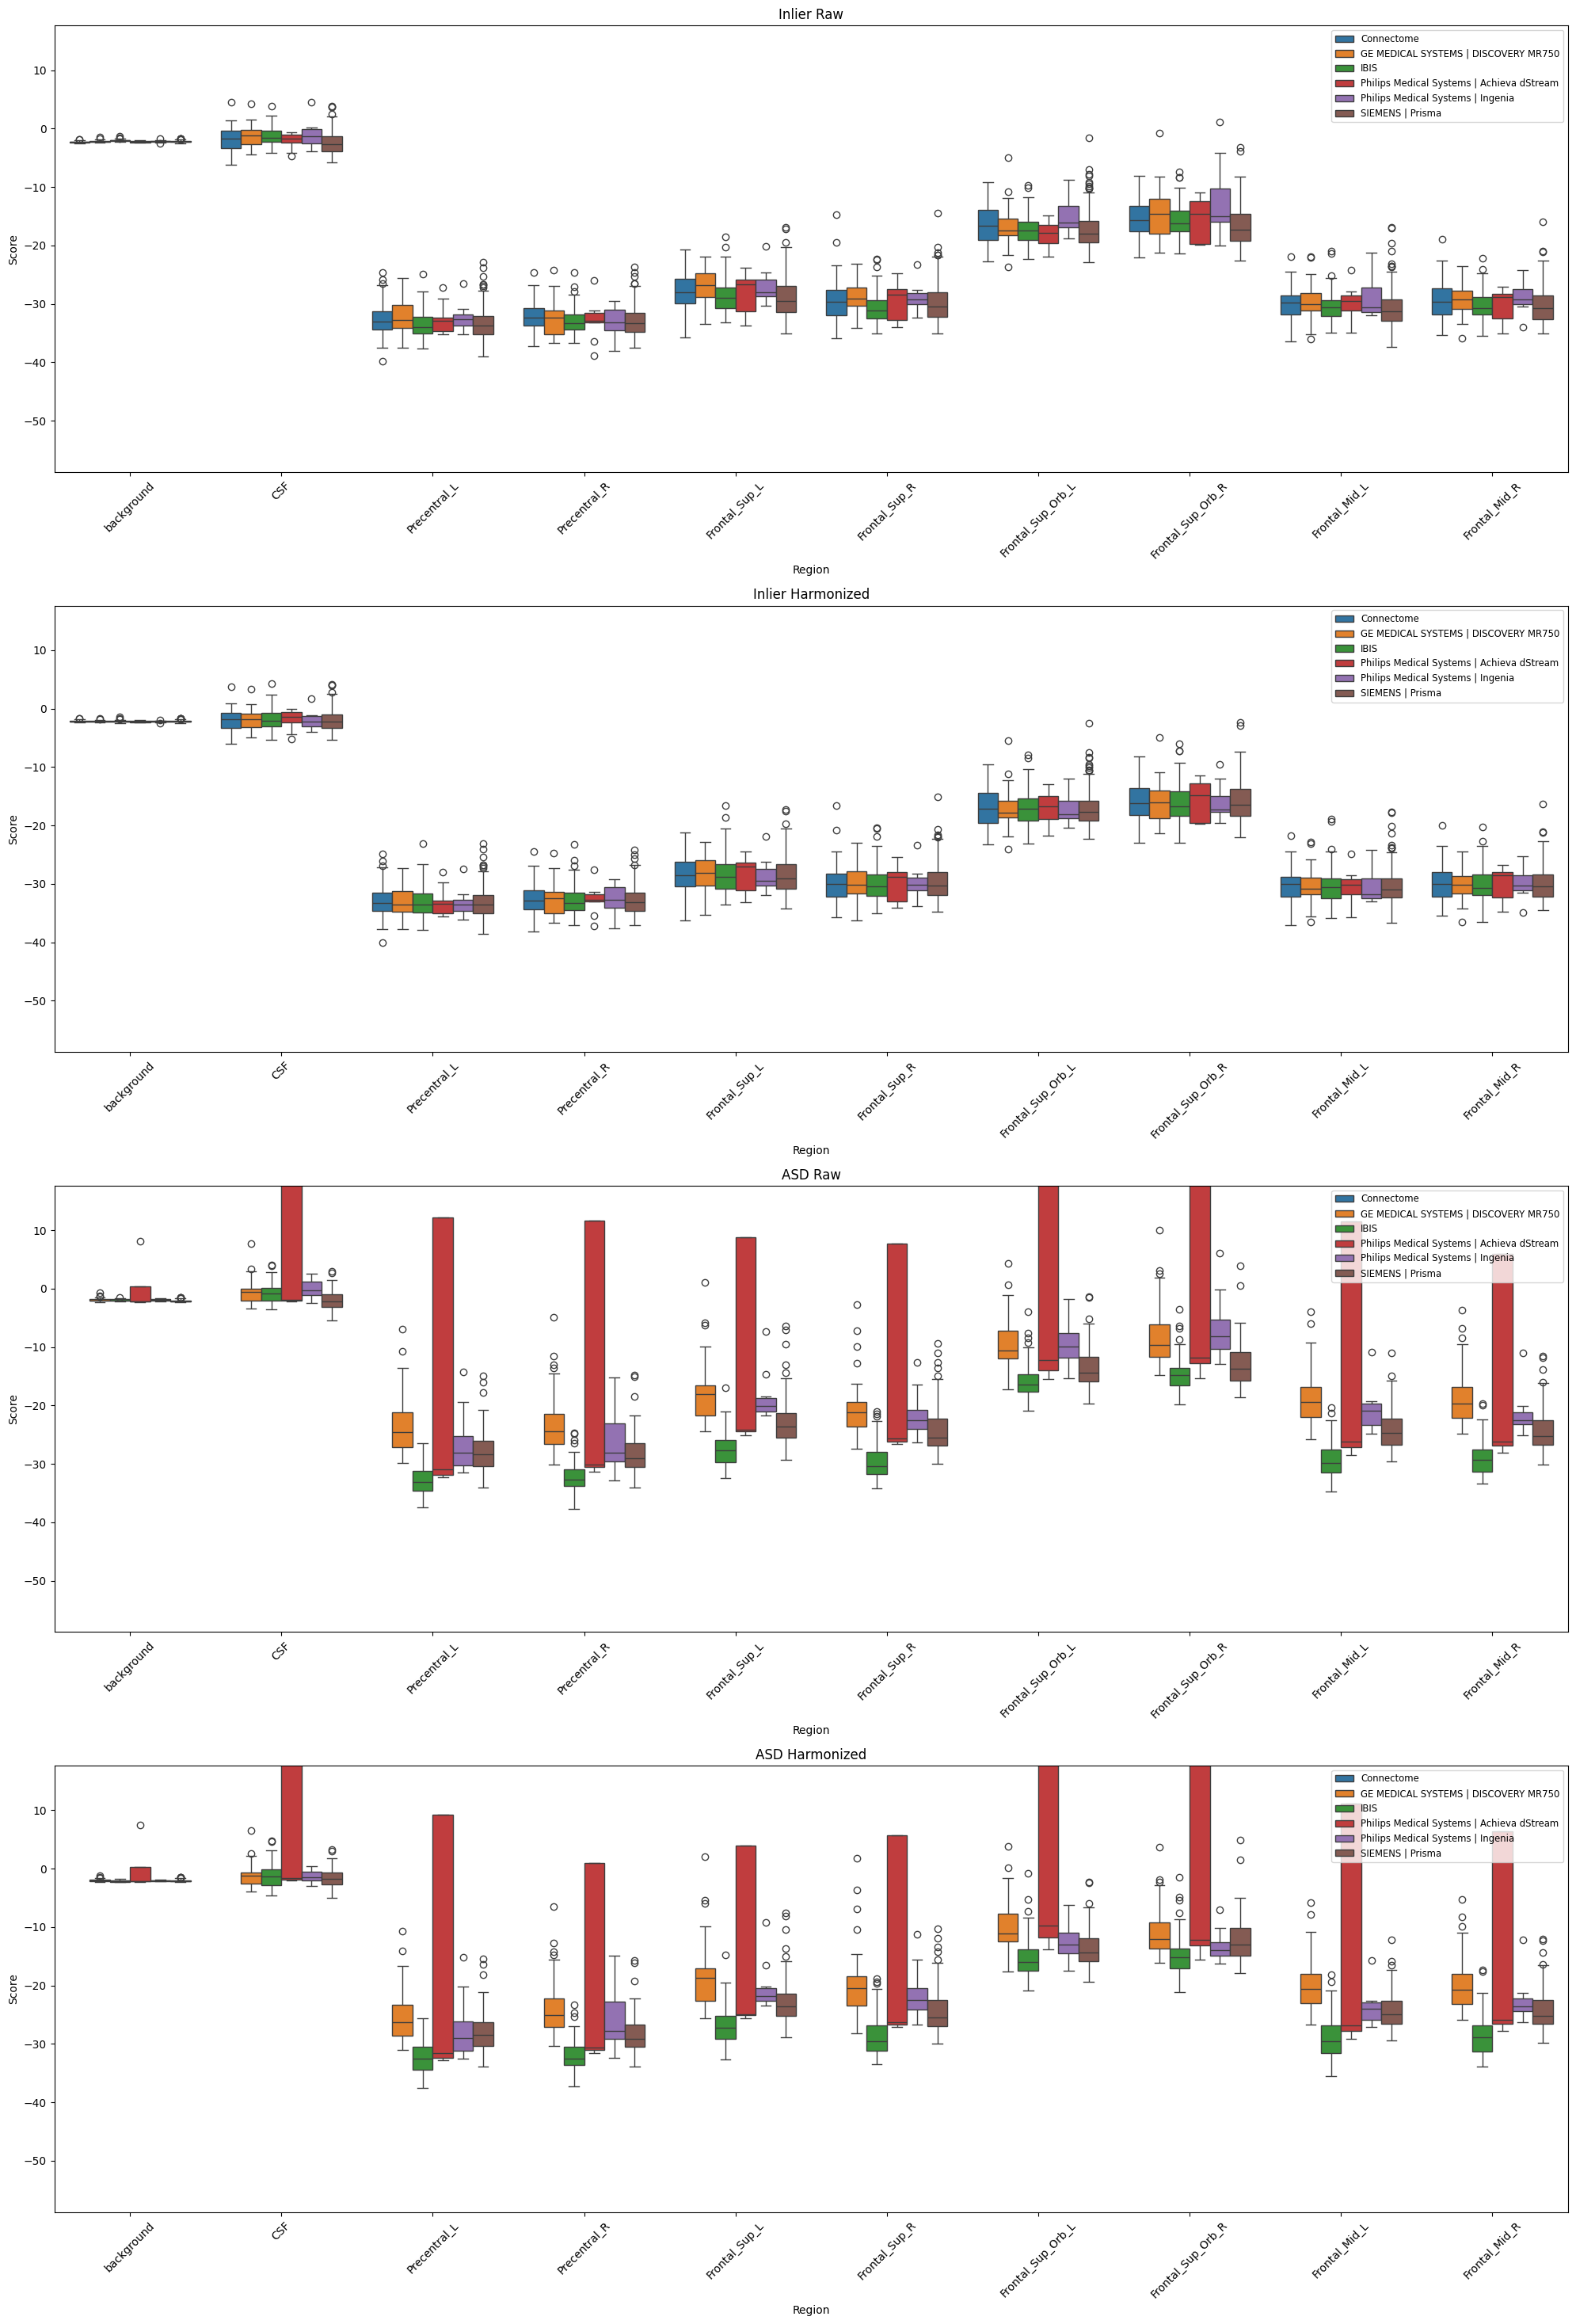

Regions 11–20


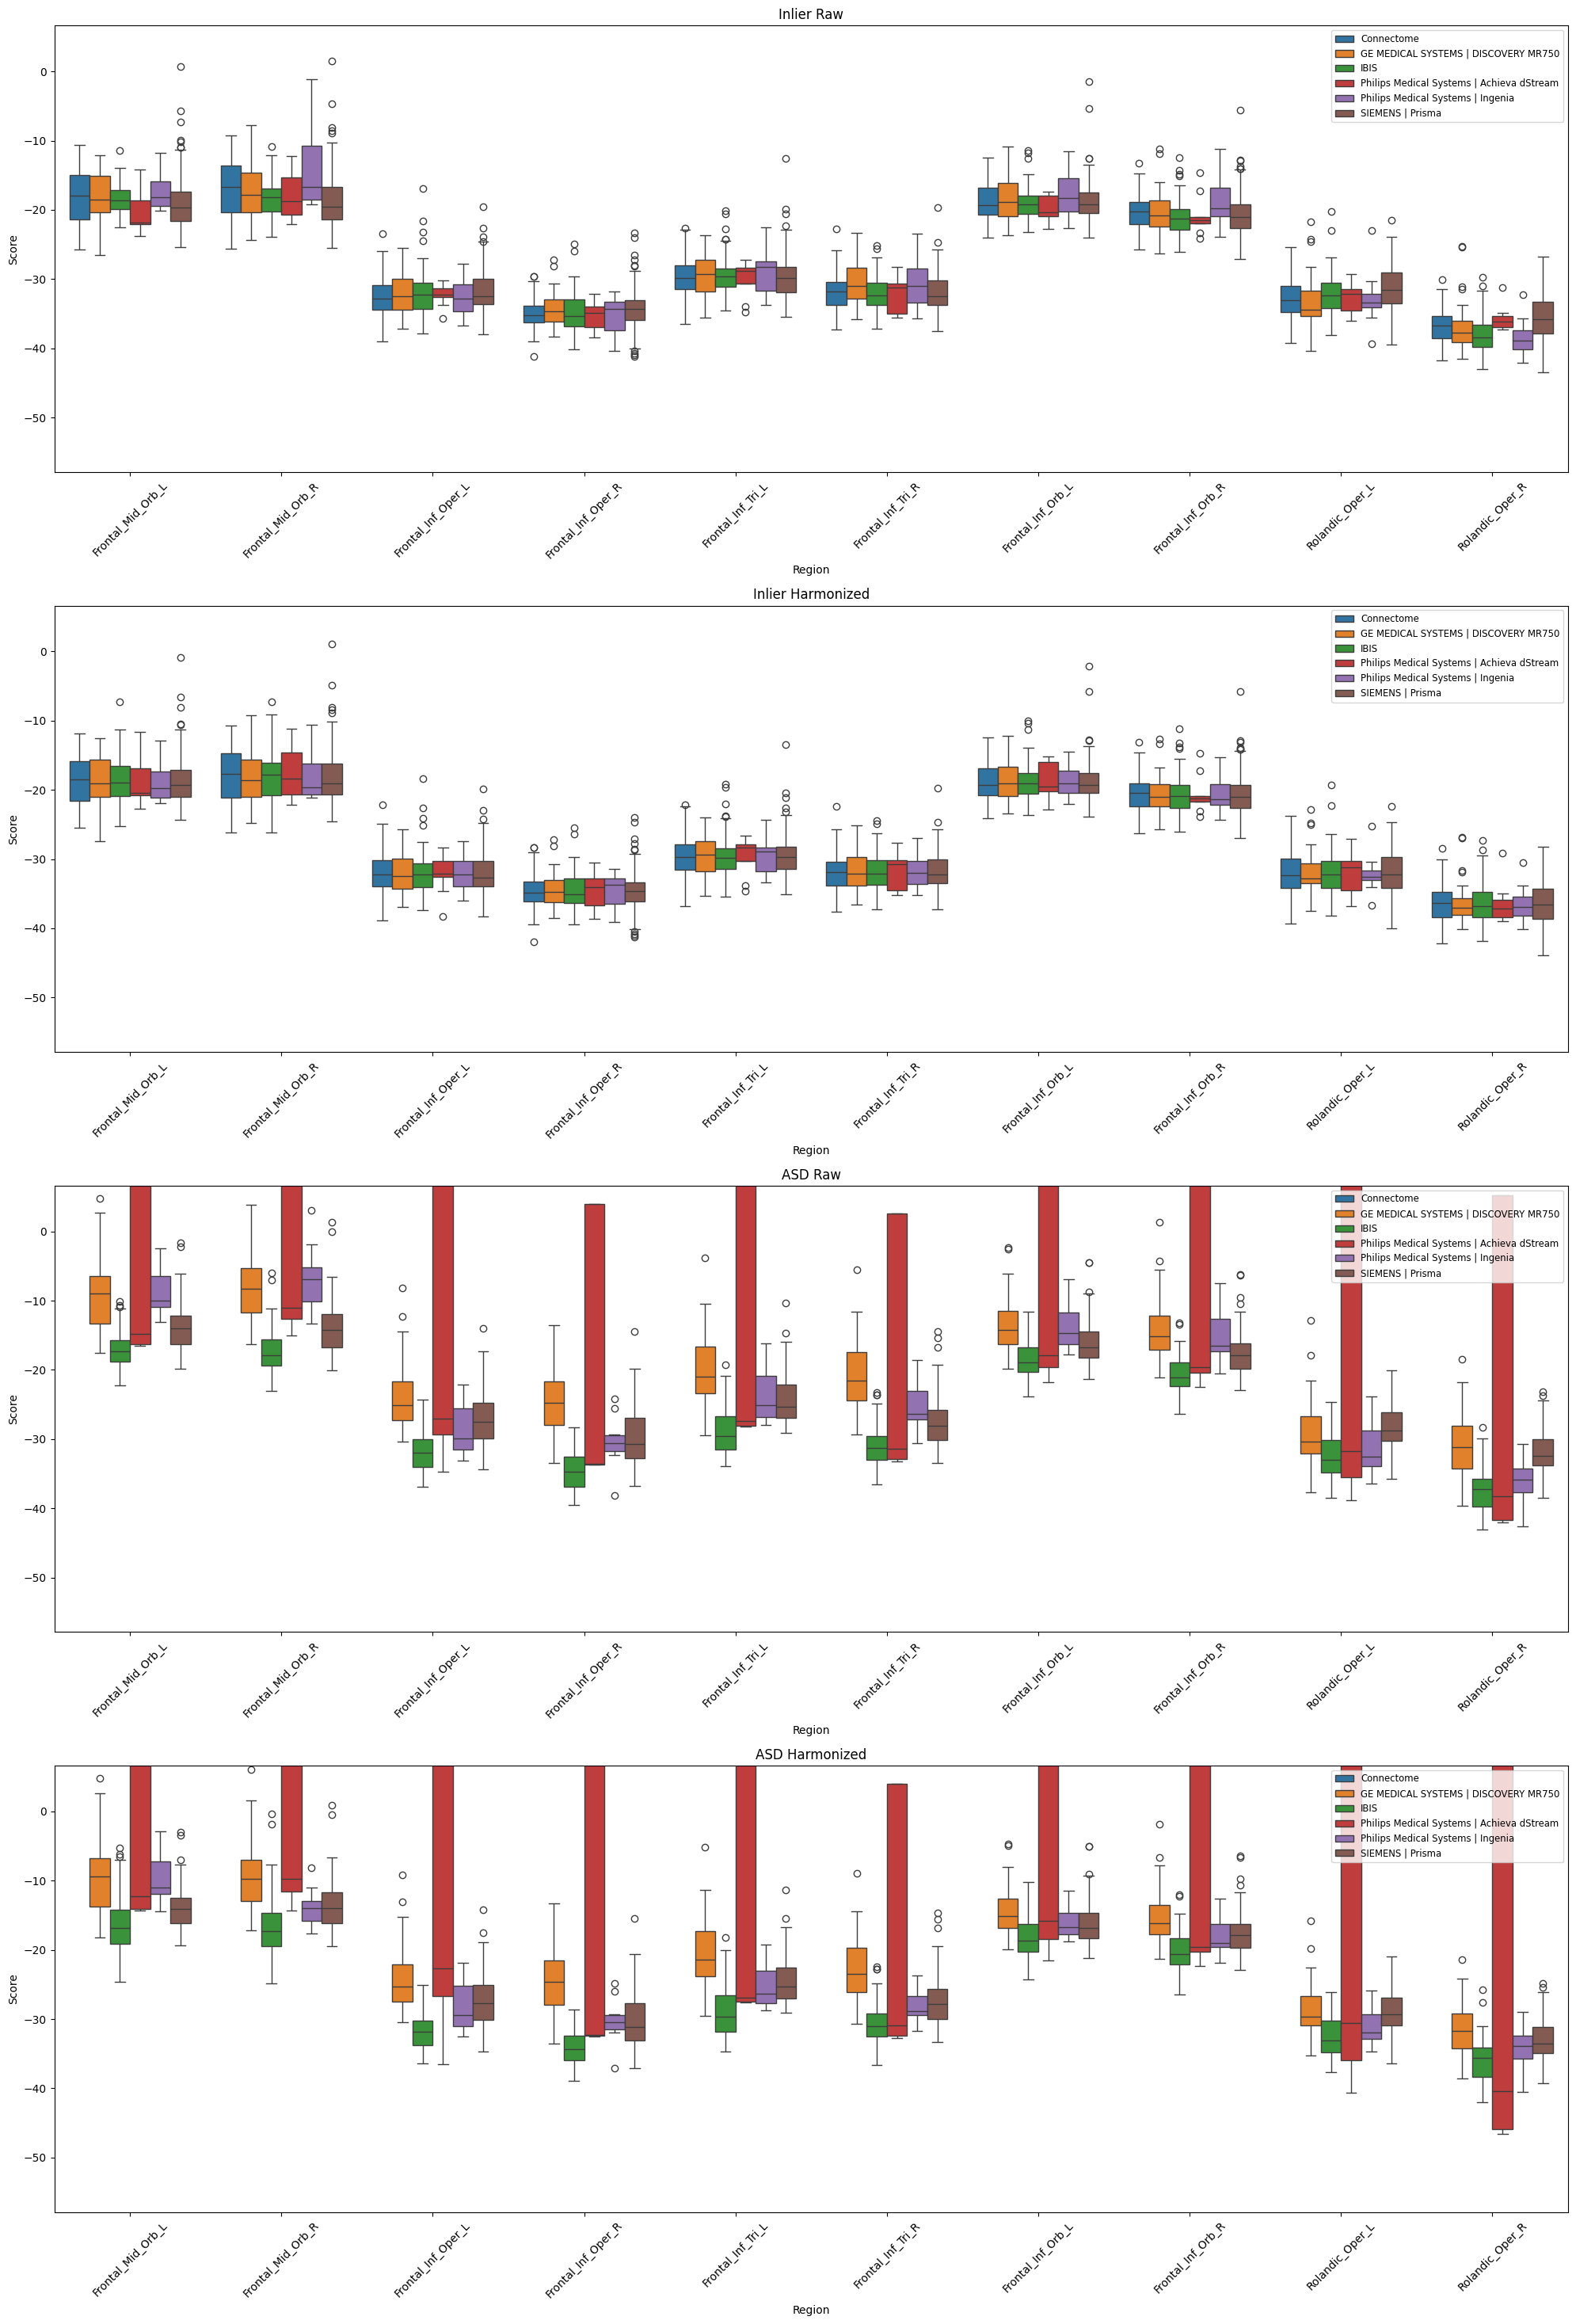

Regions 21–30


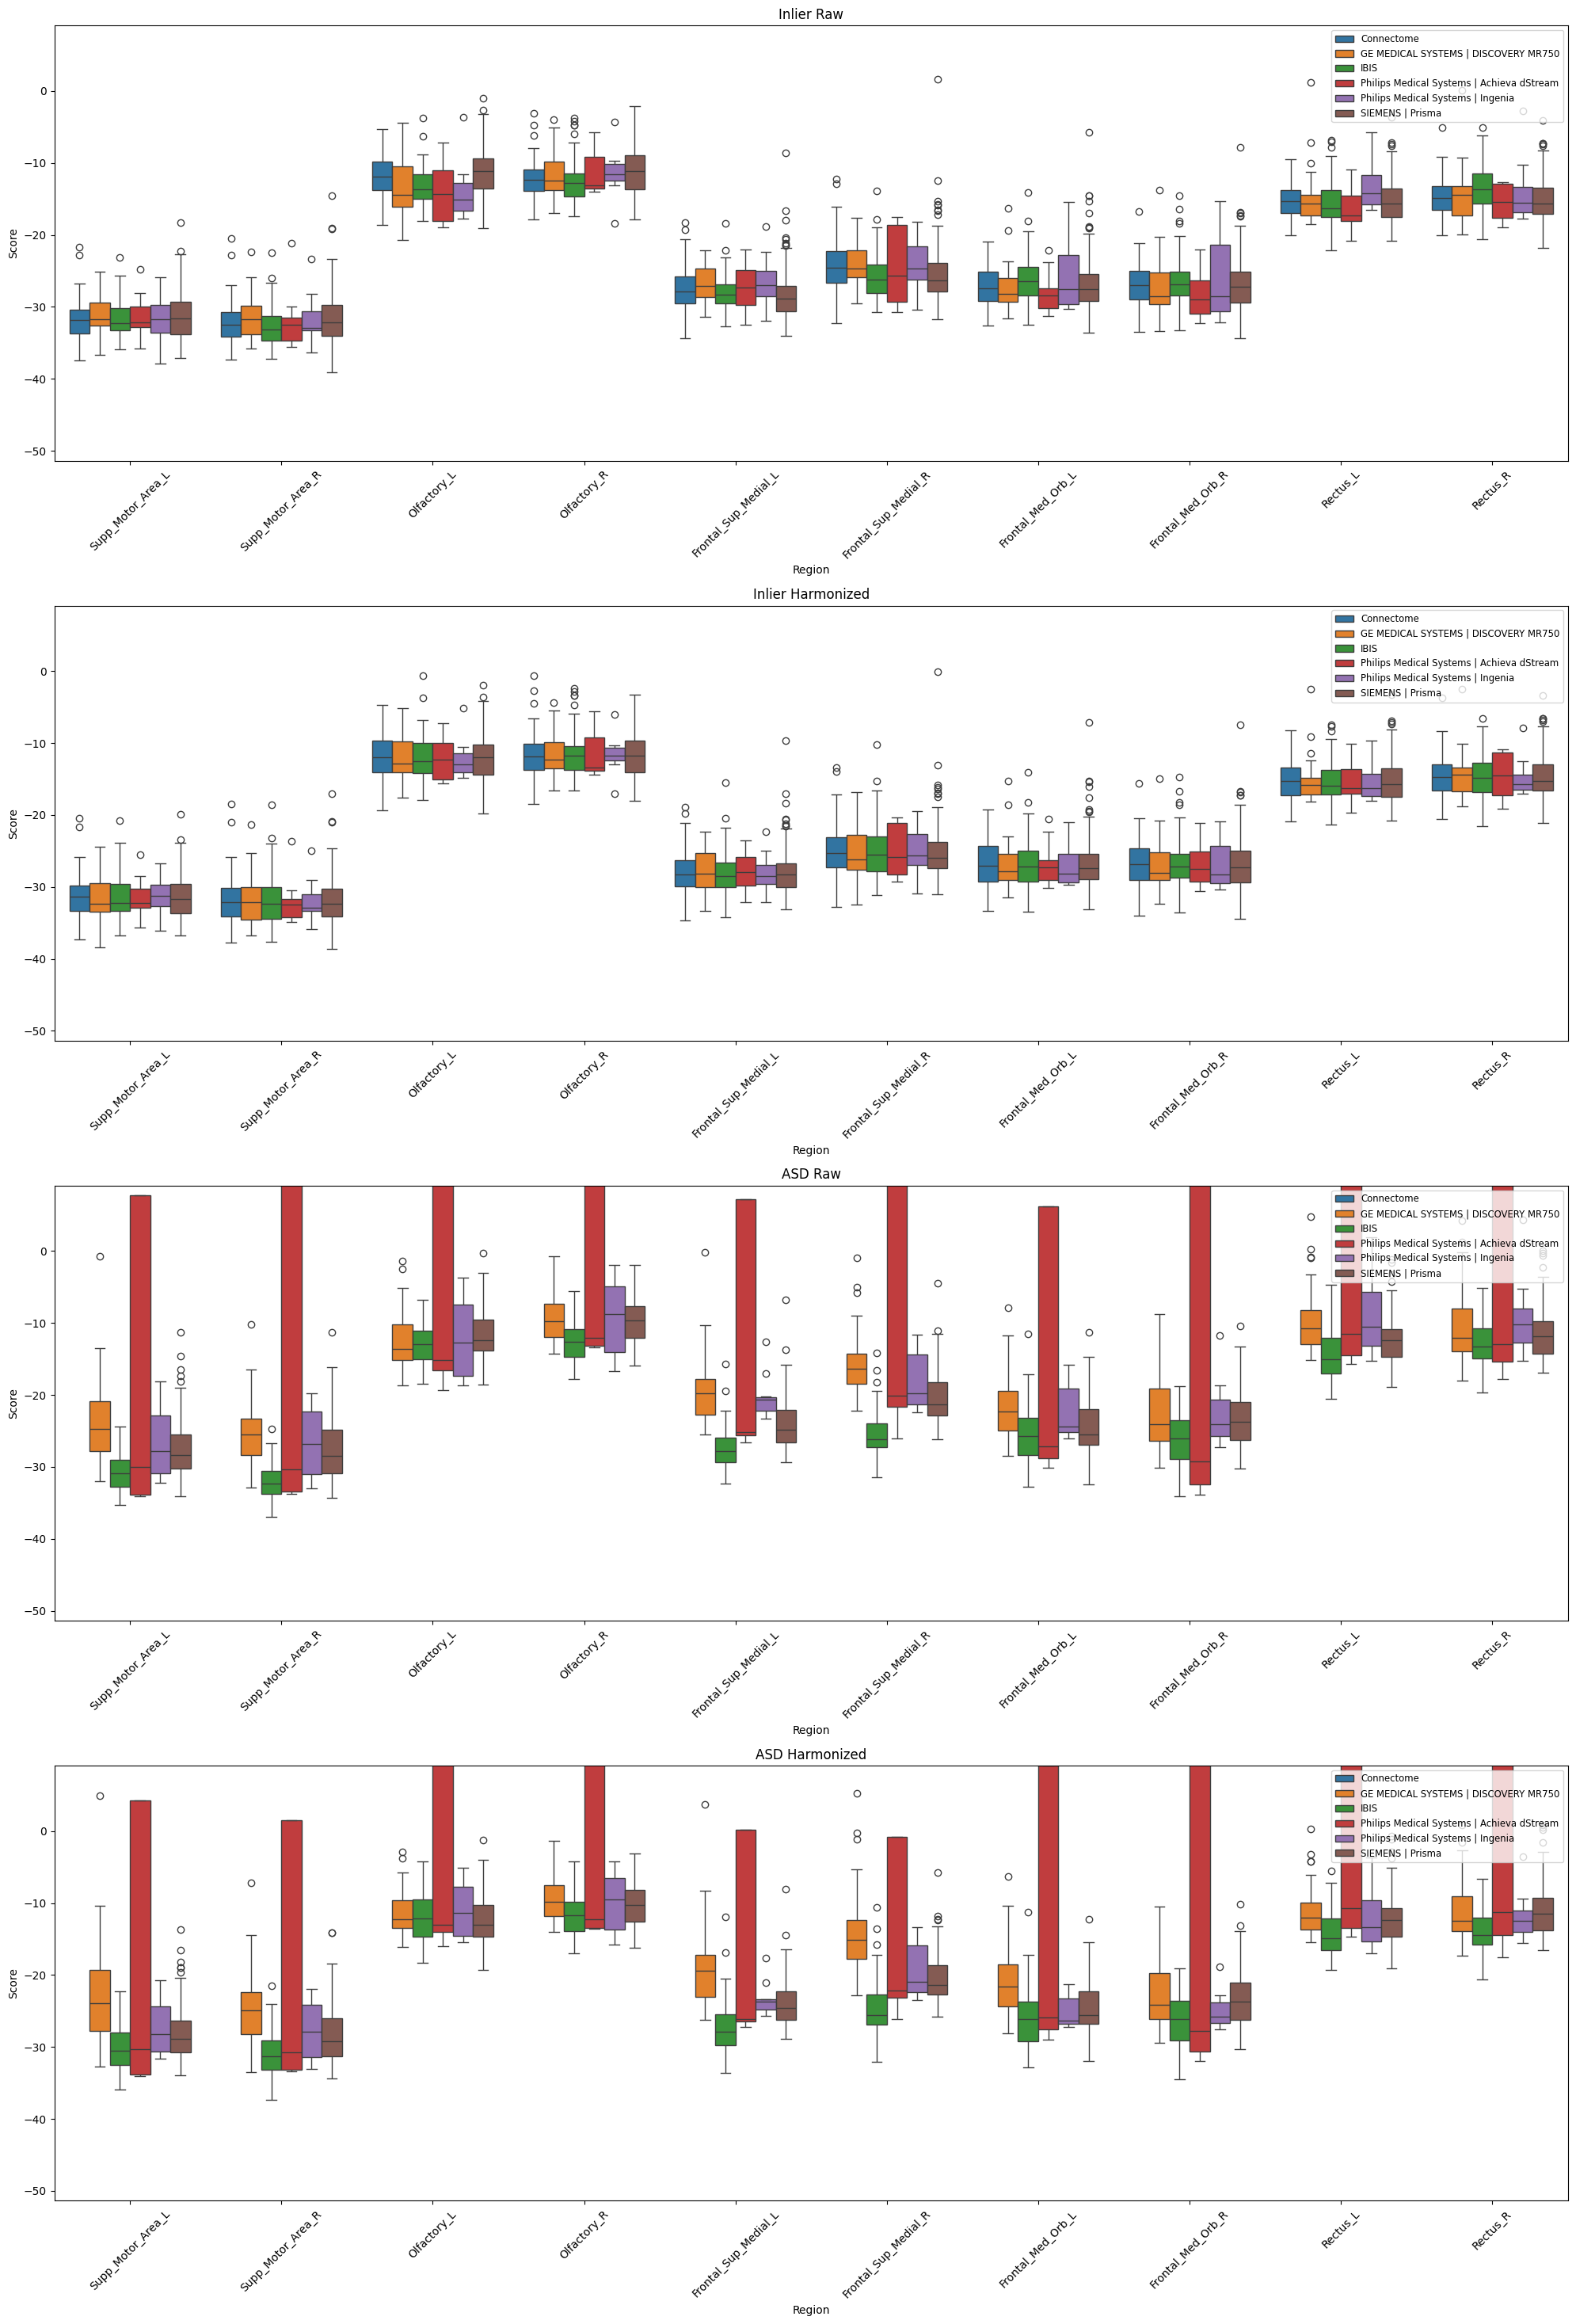

Regions 31–40


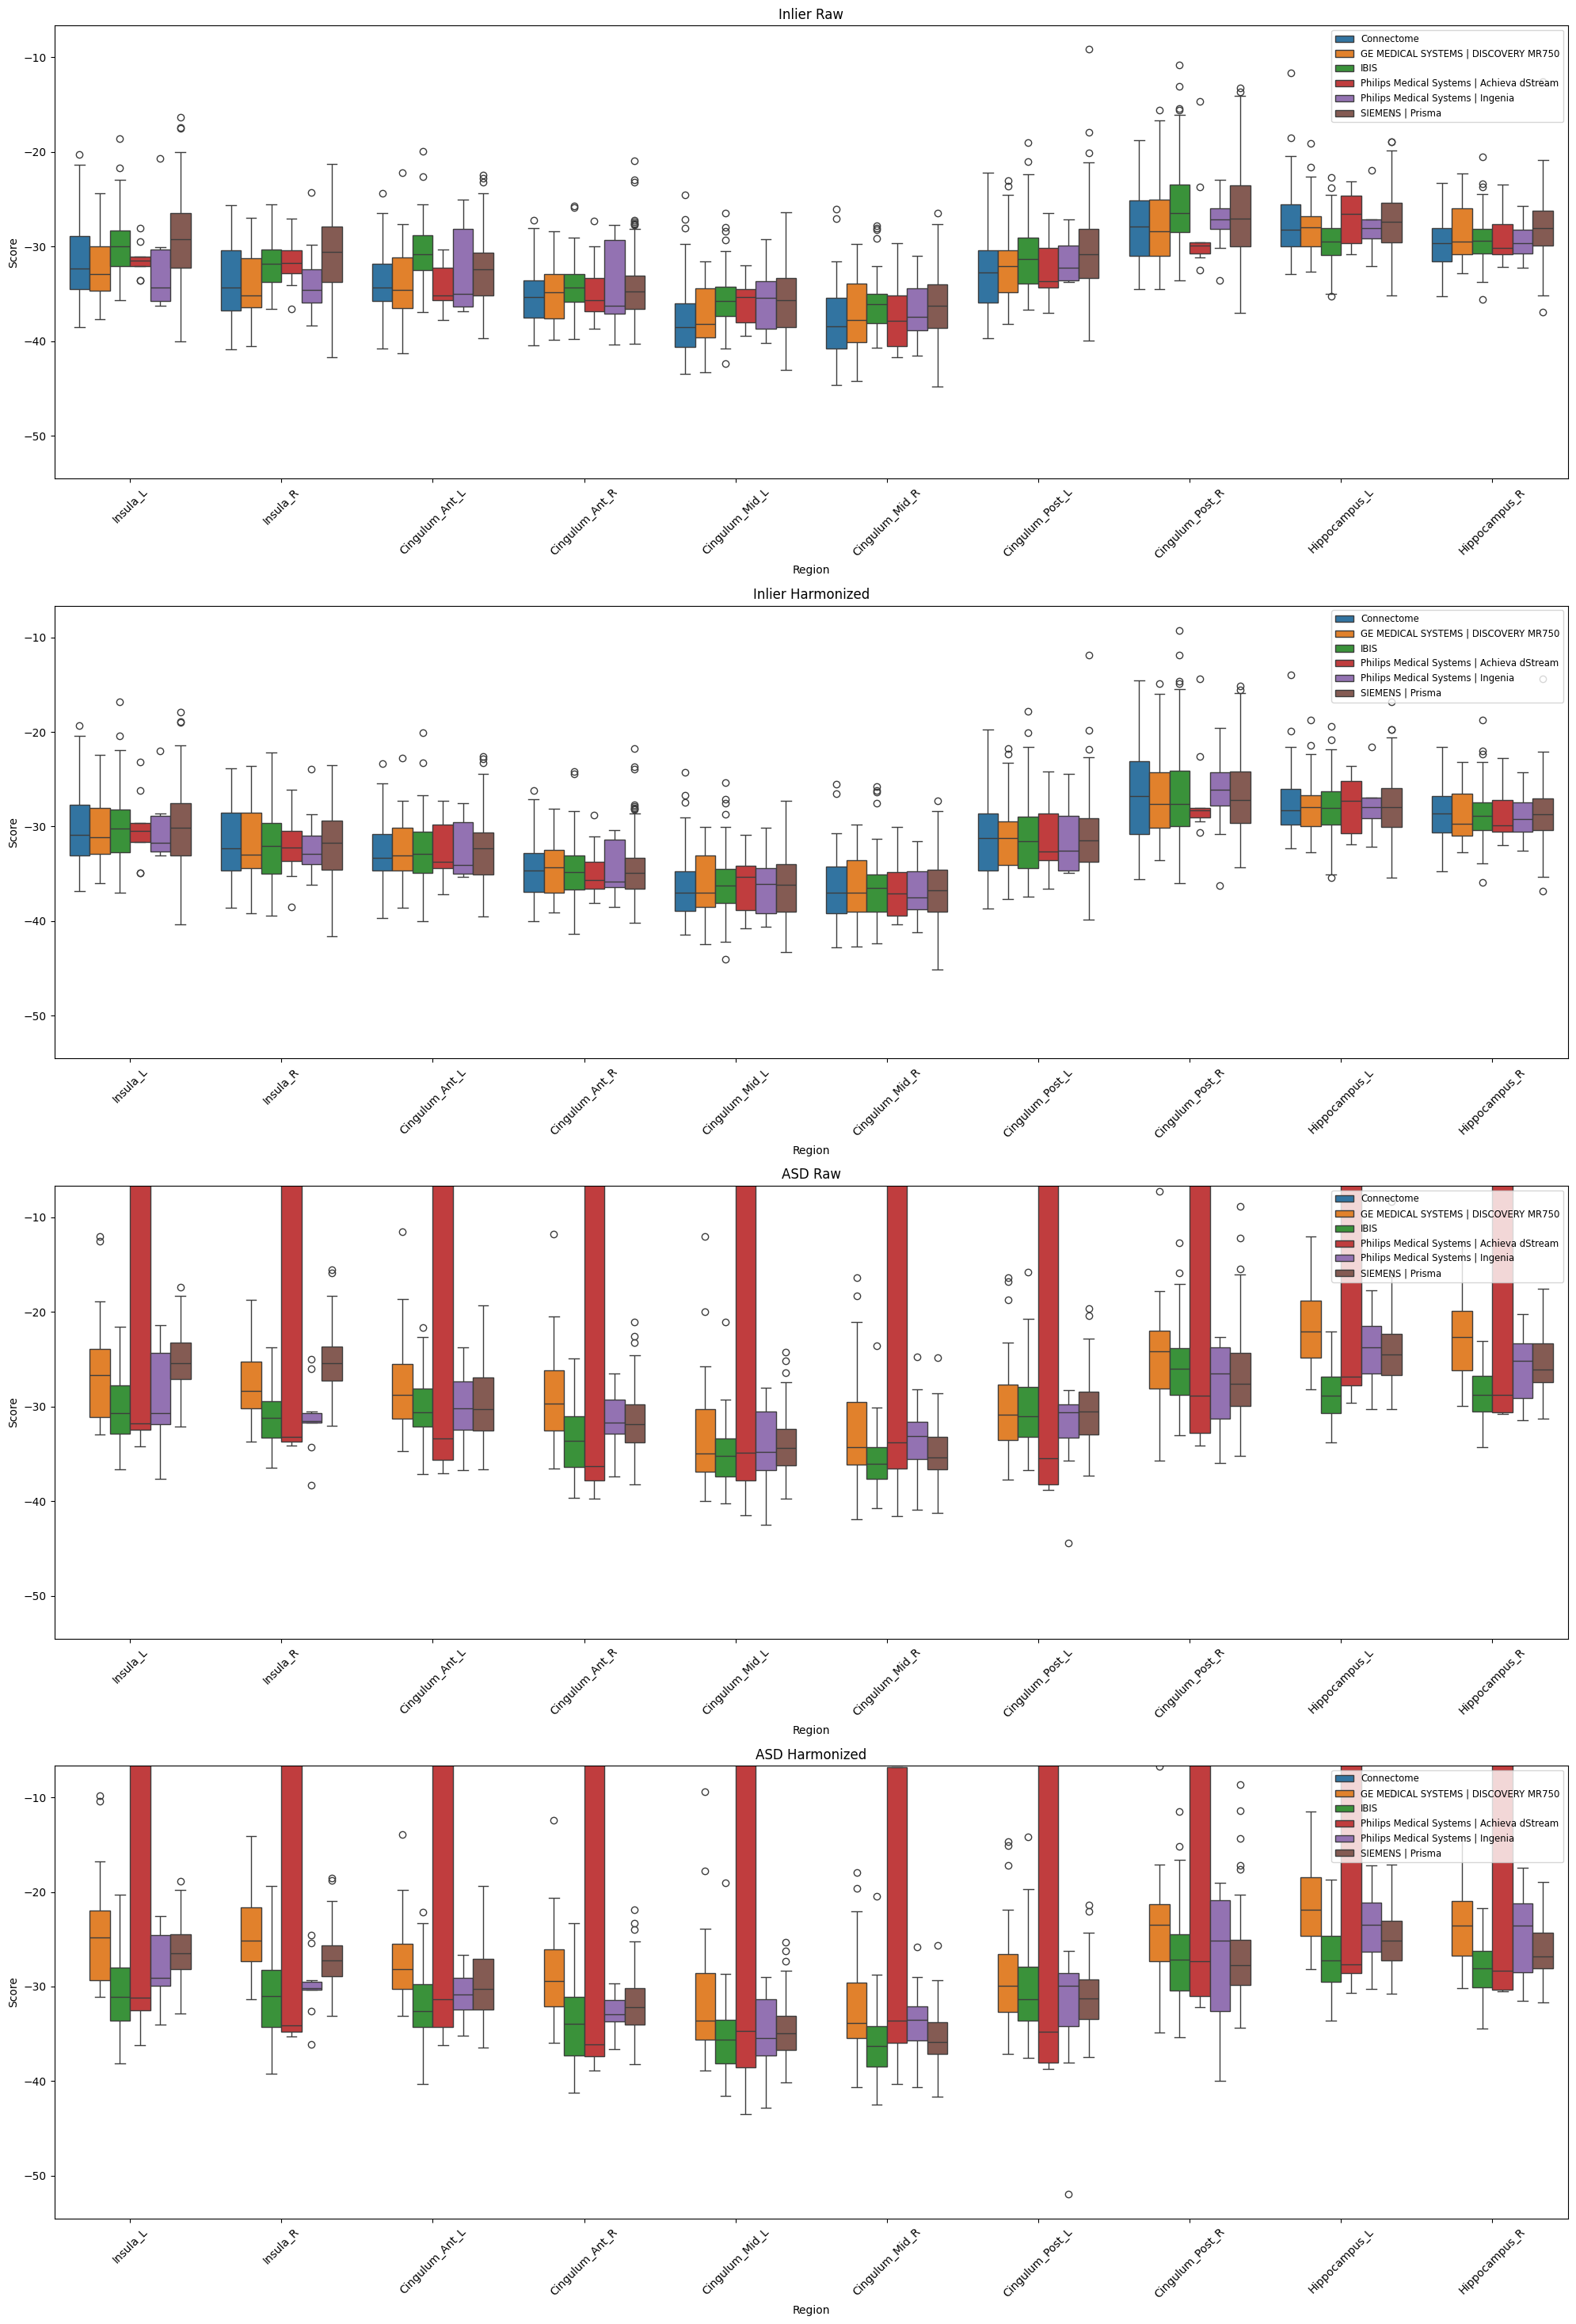

Regions 41–50


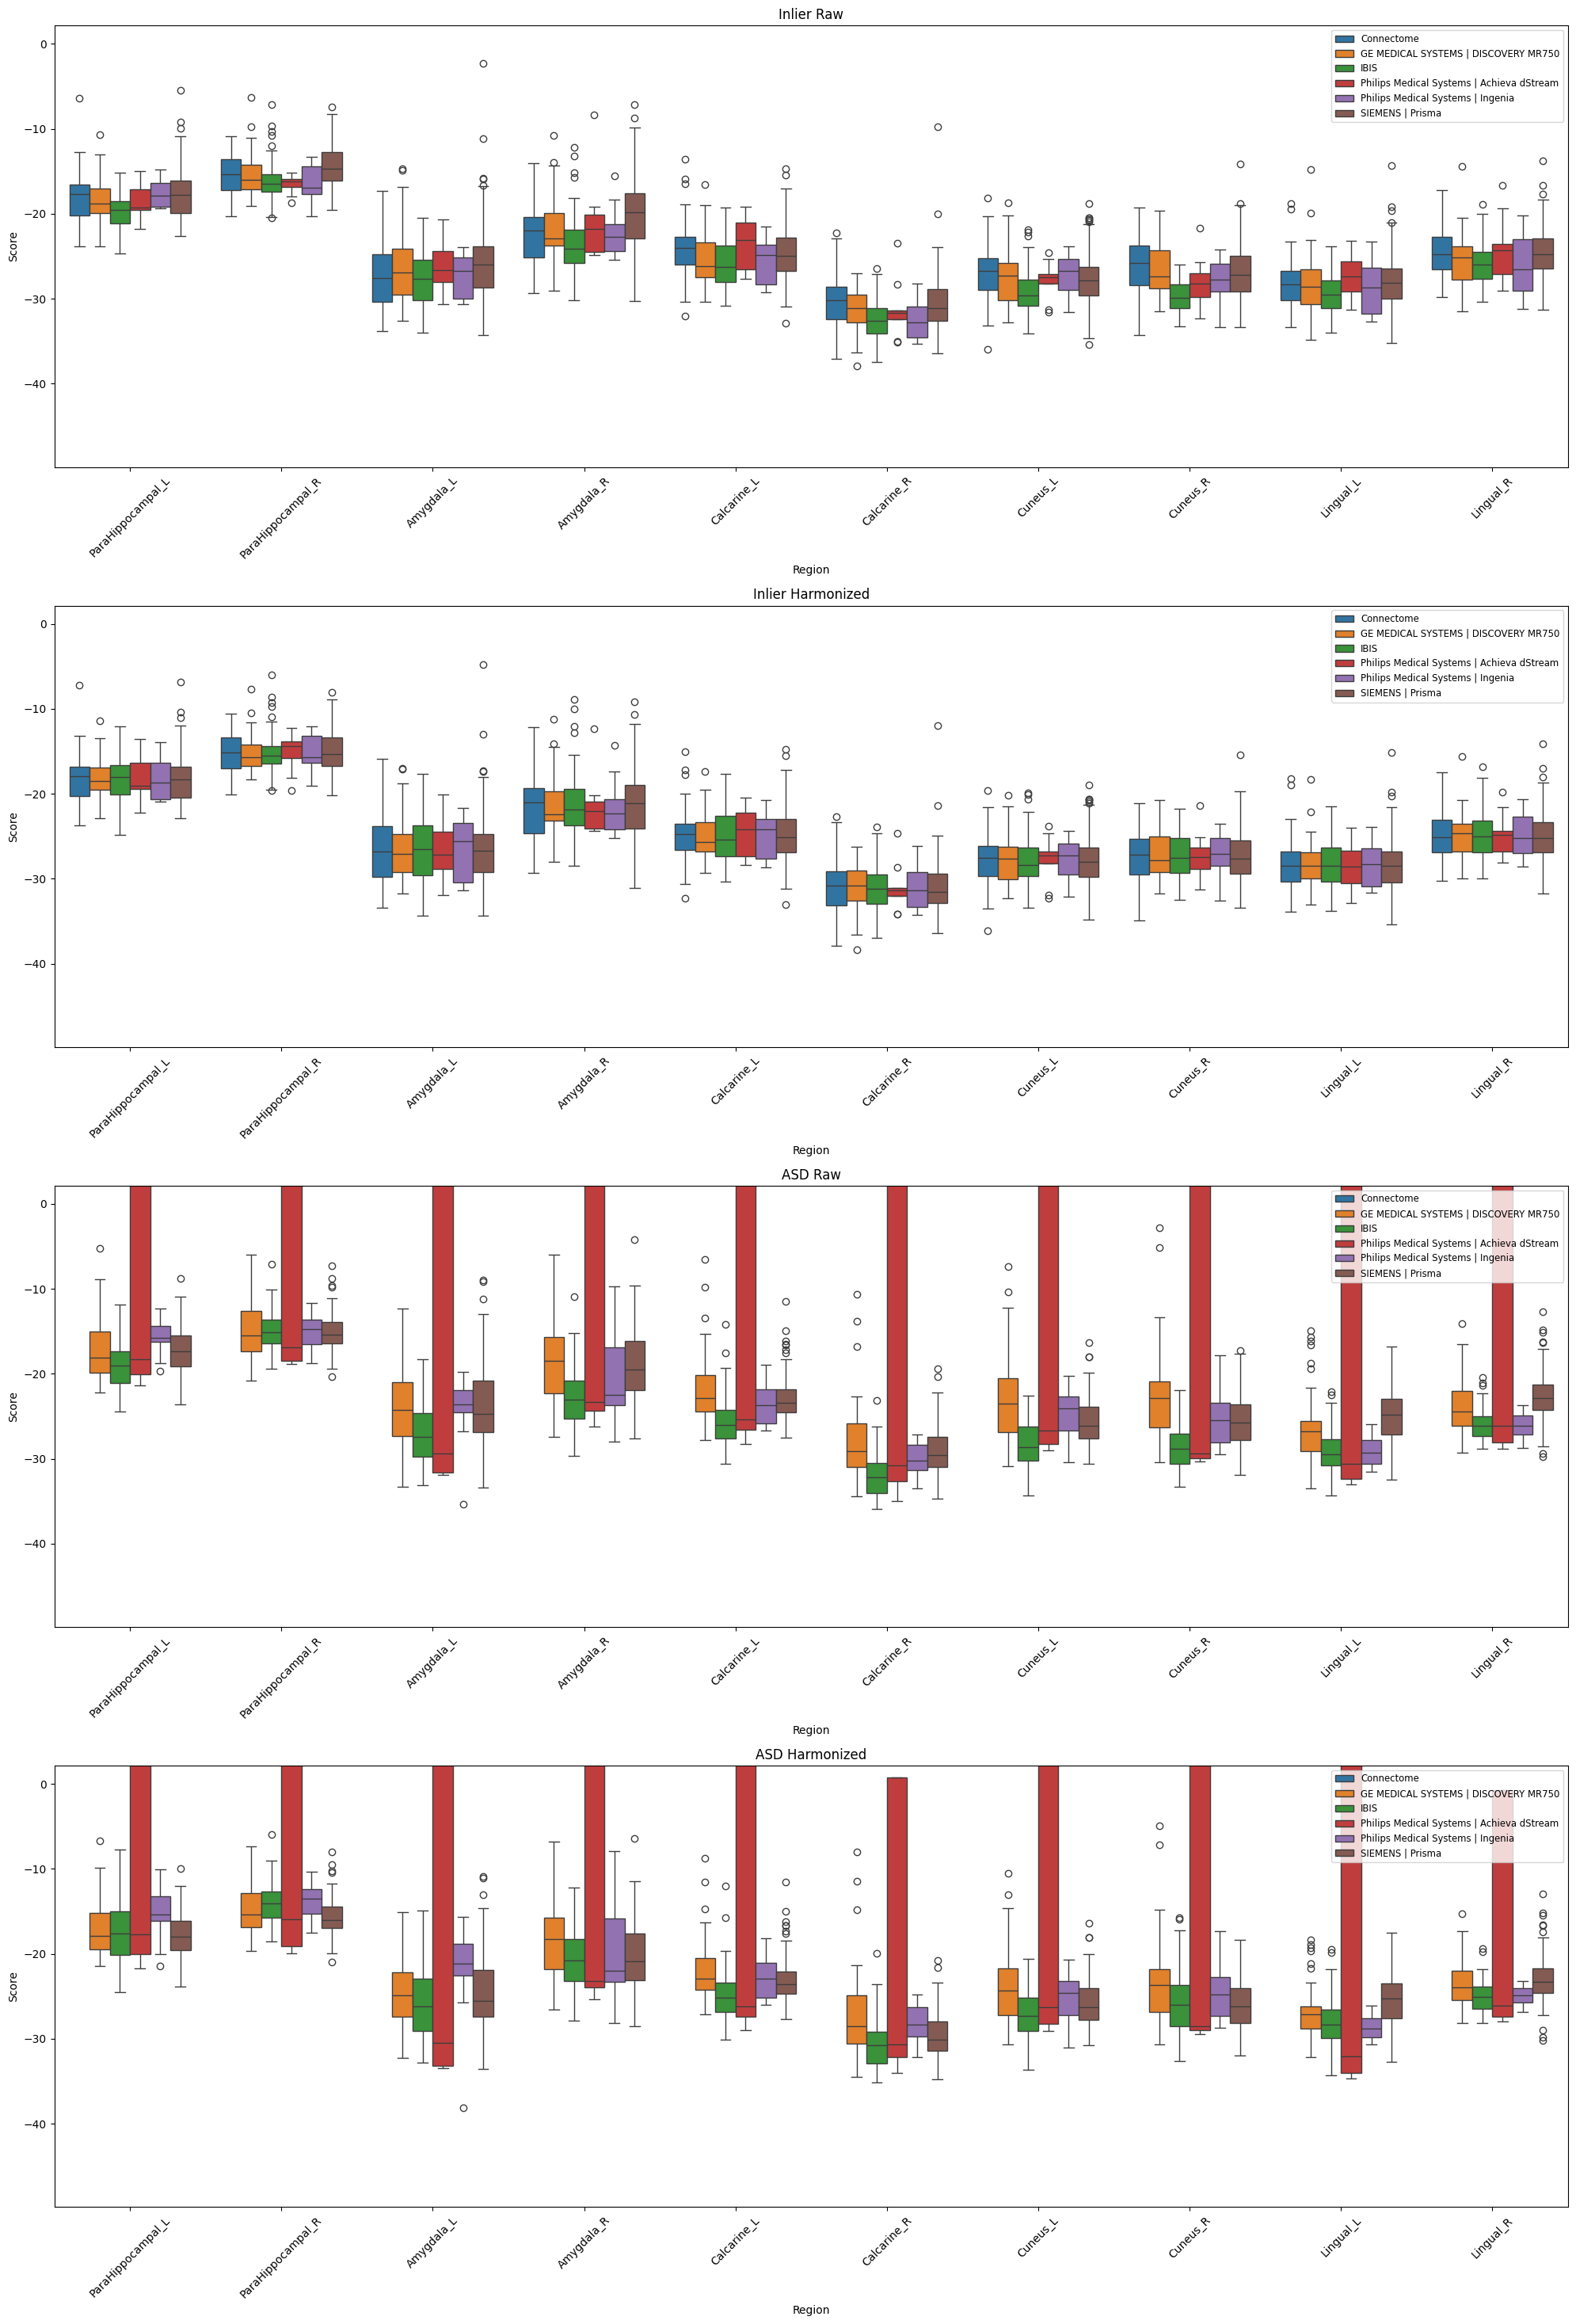

Regions 51–60


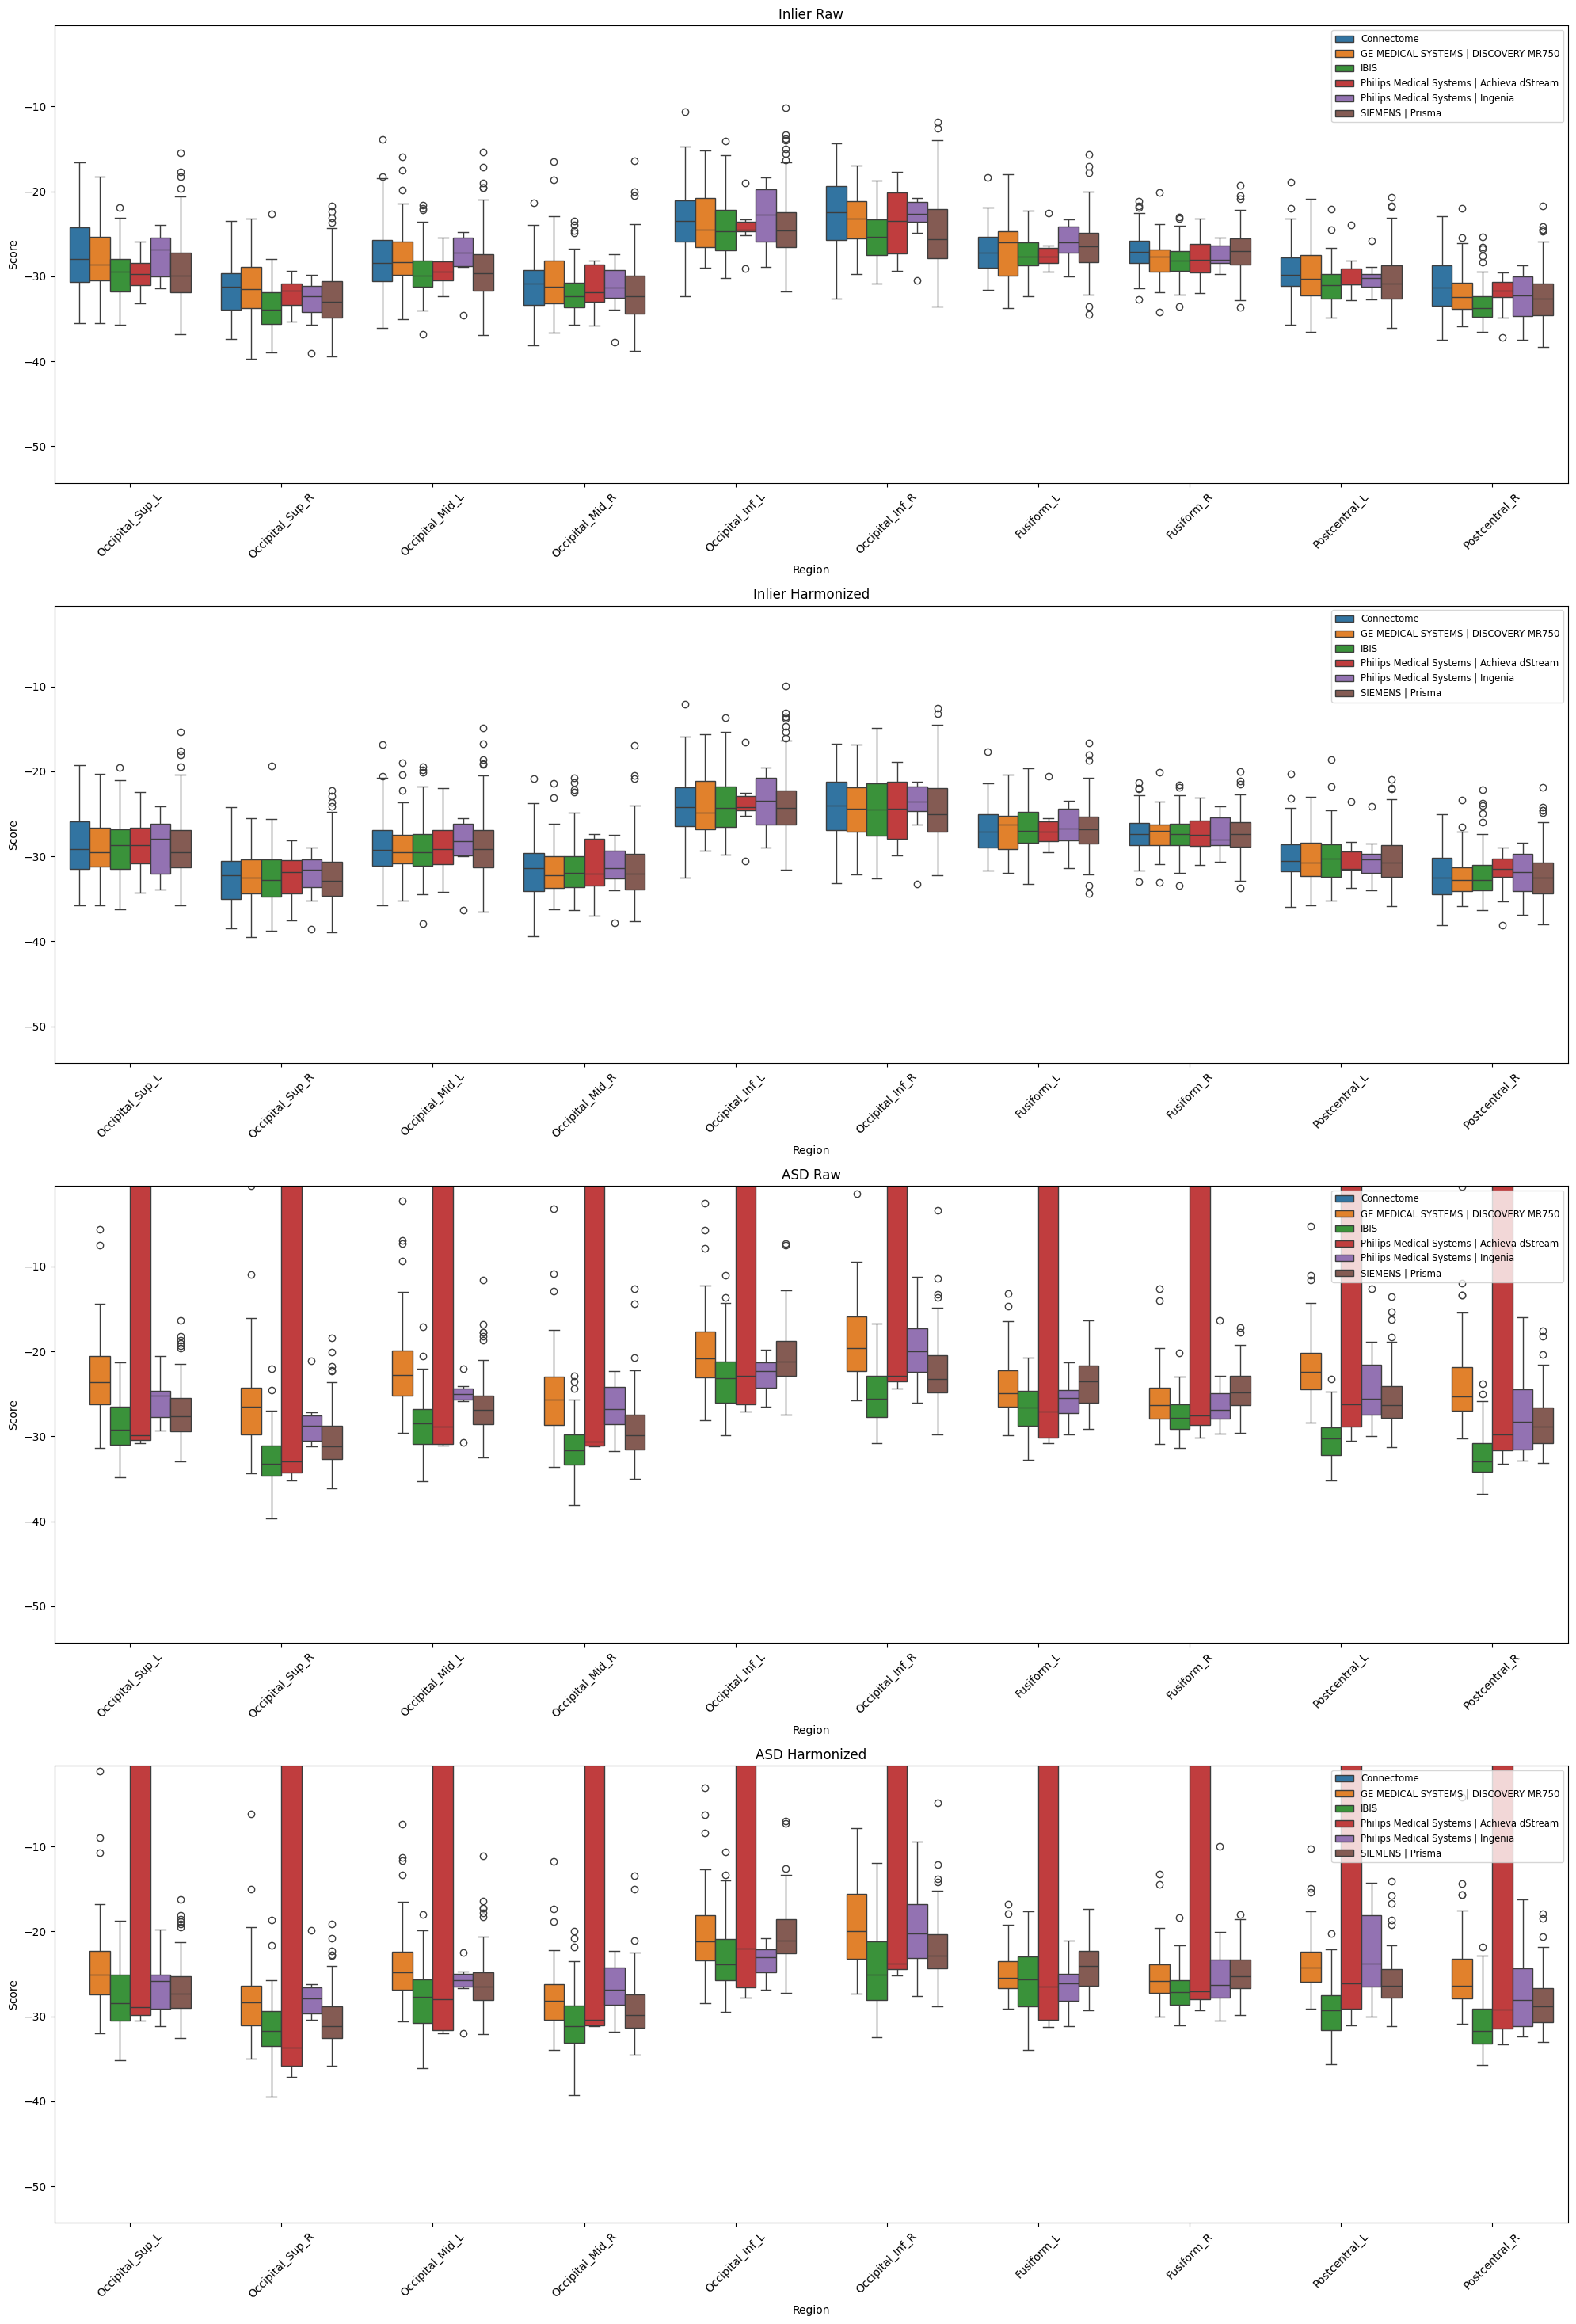

Regions 61–70


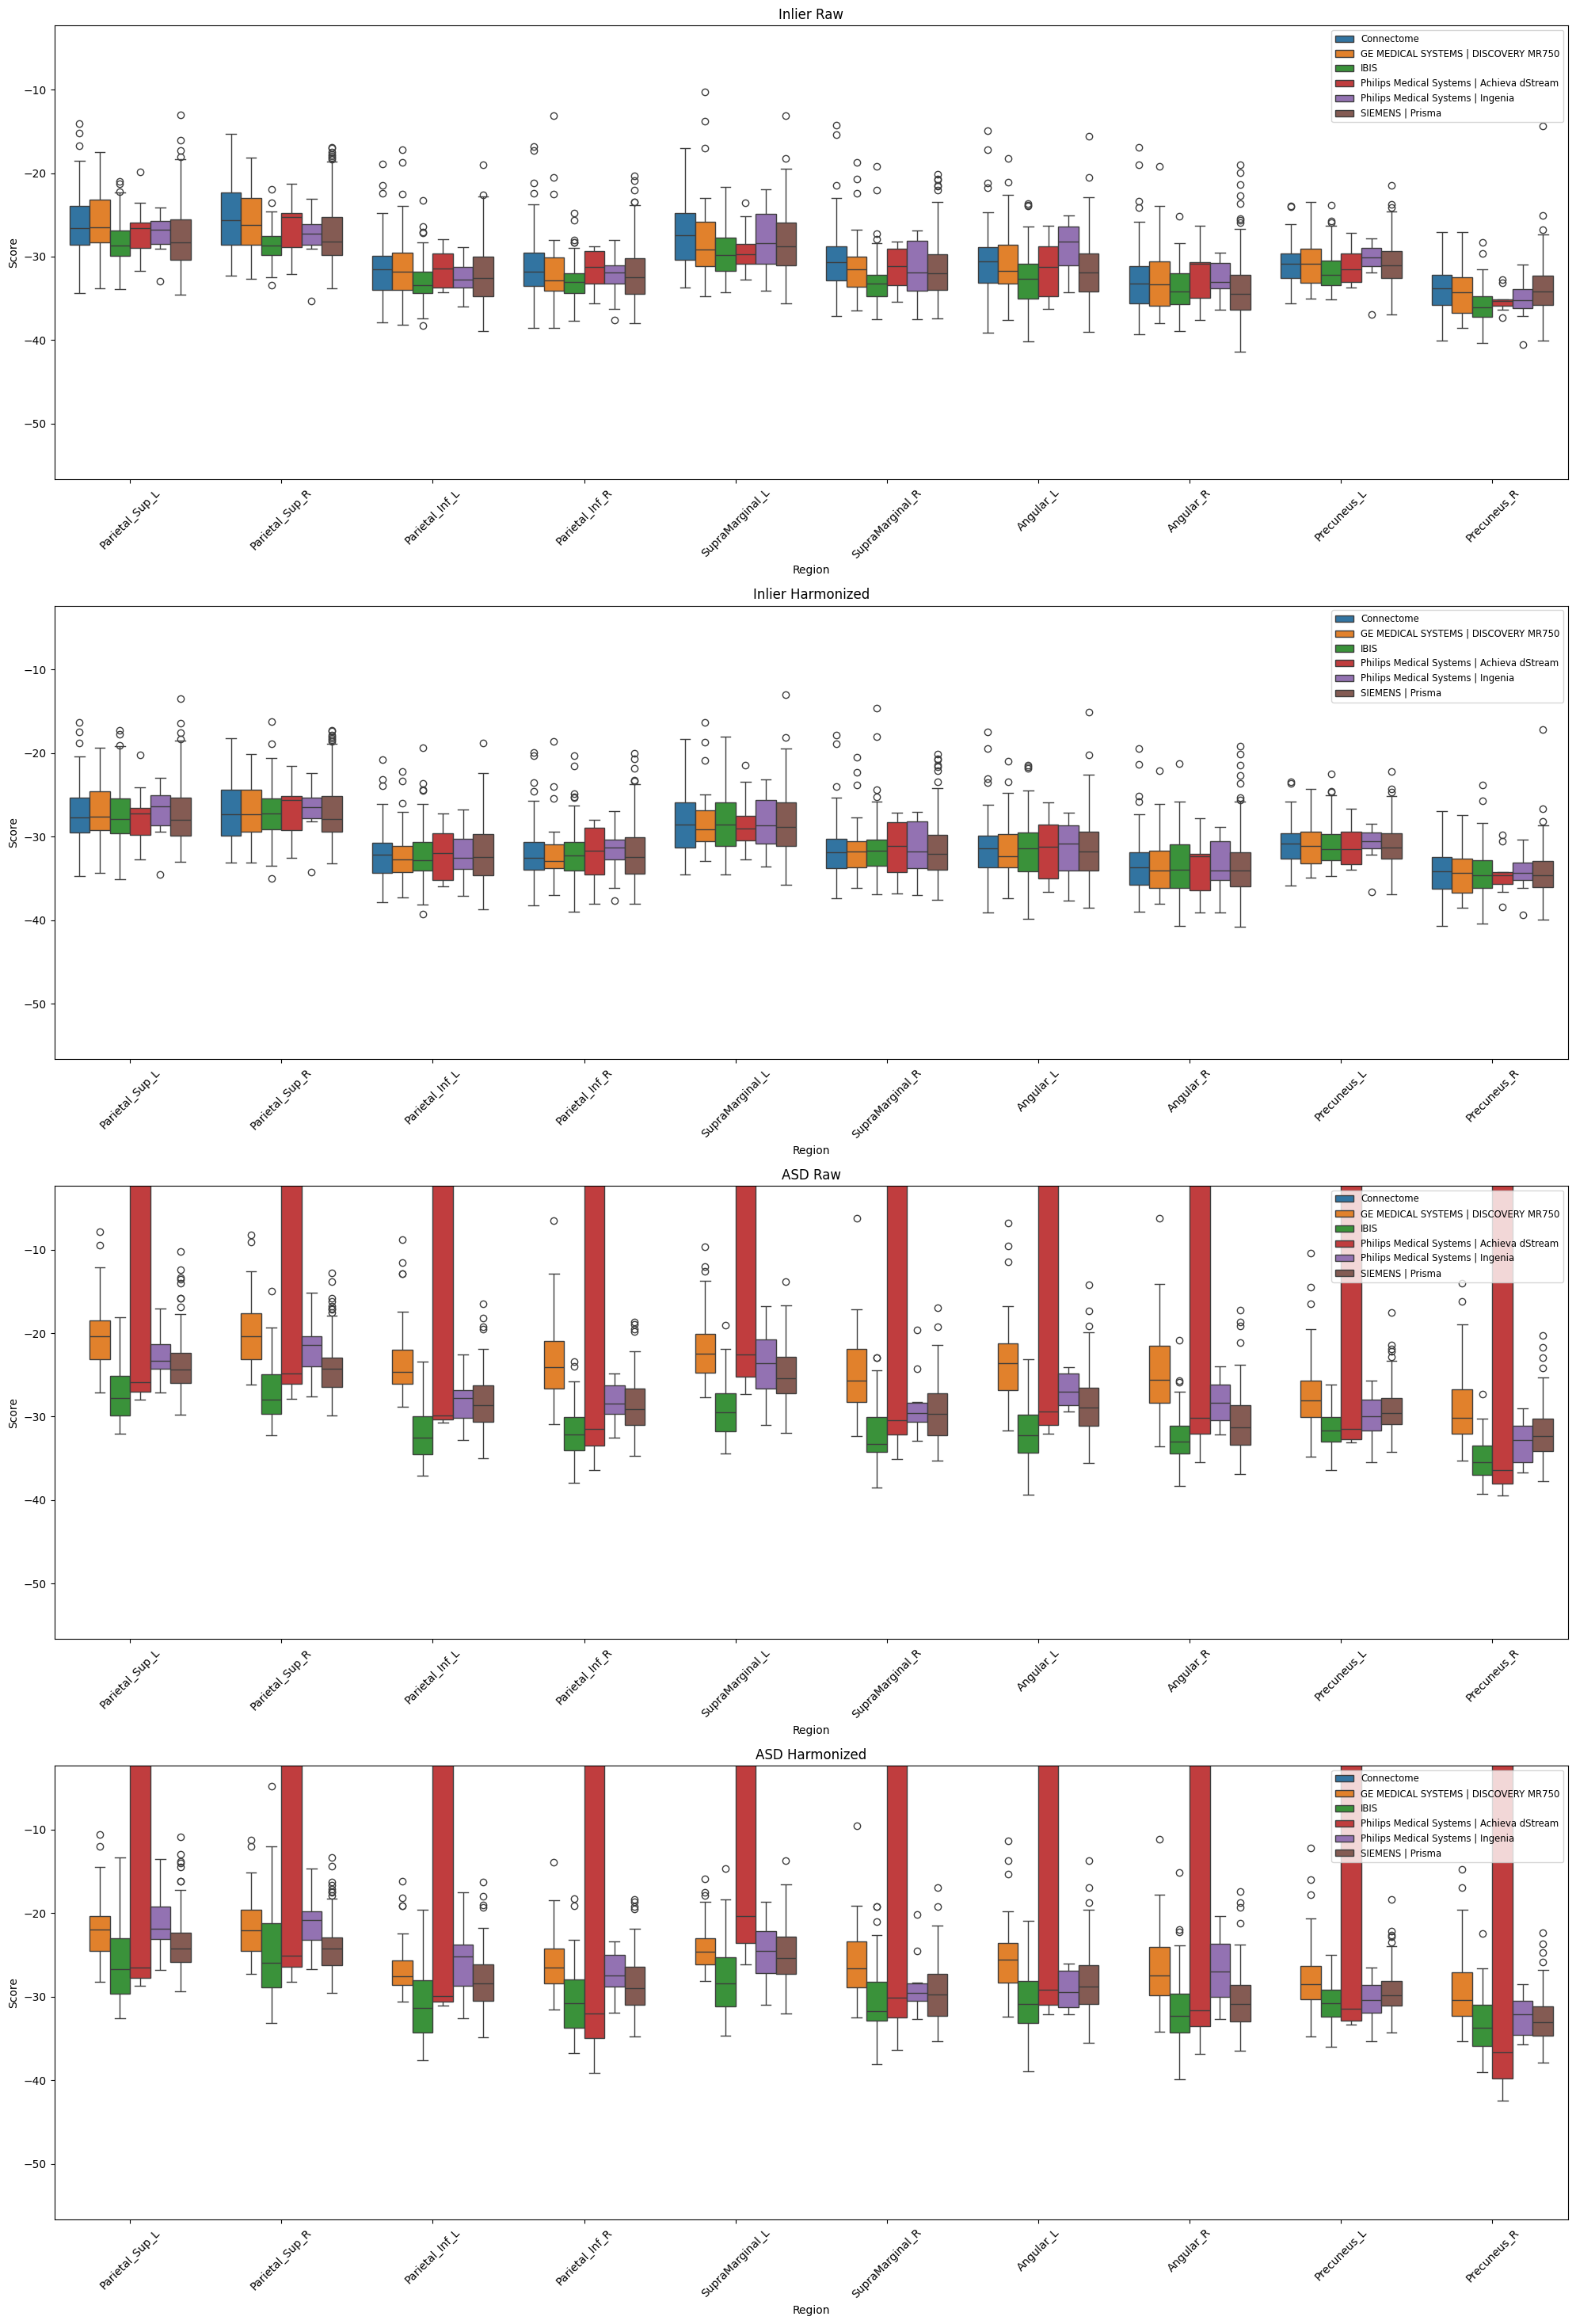

Regions 71–80


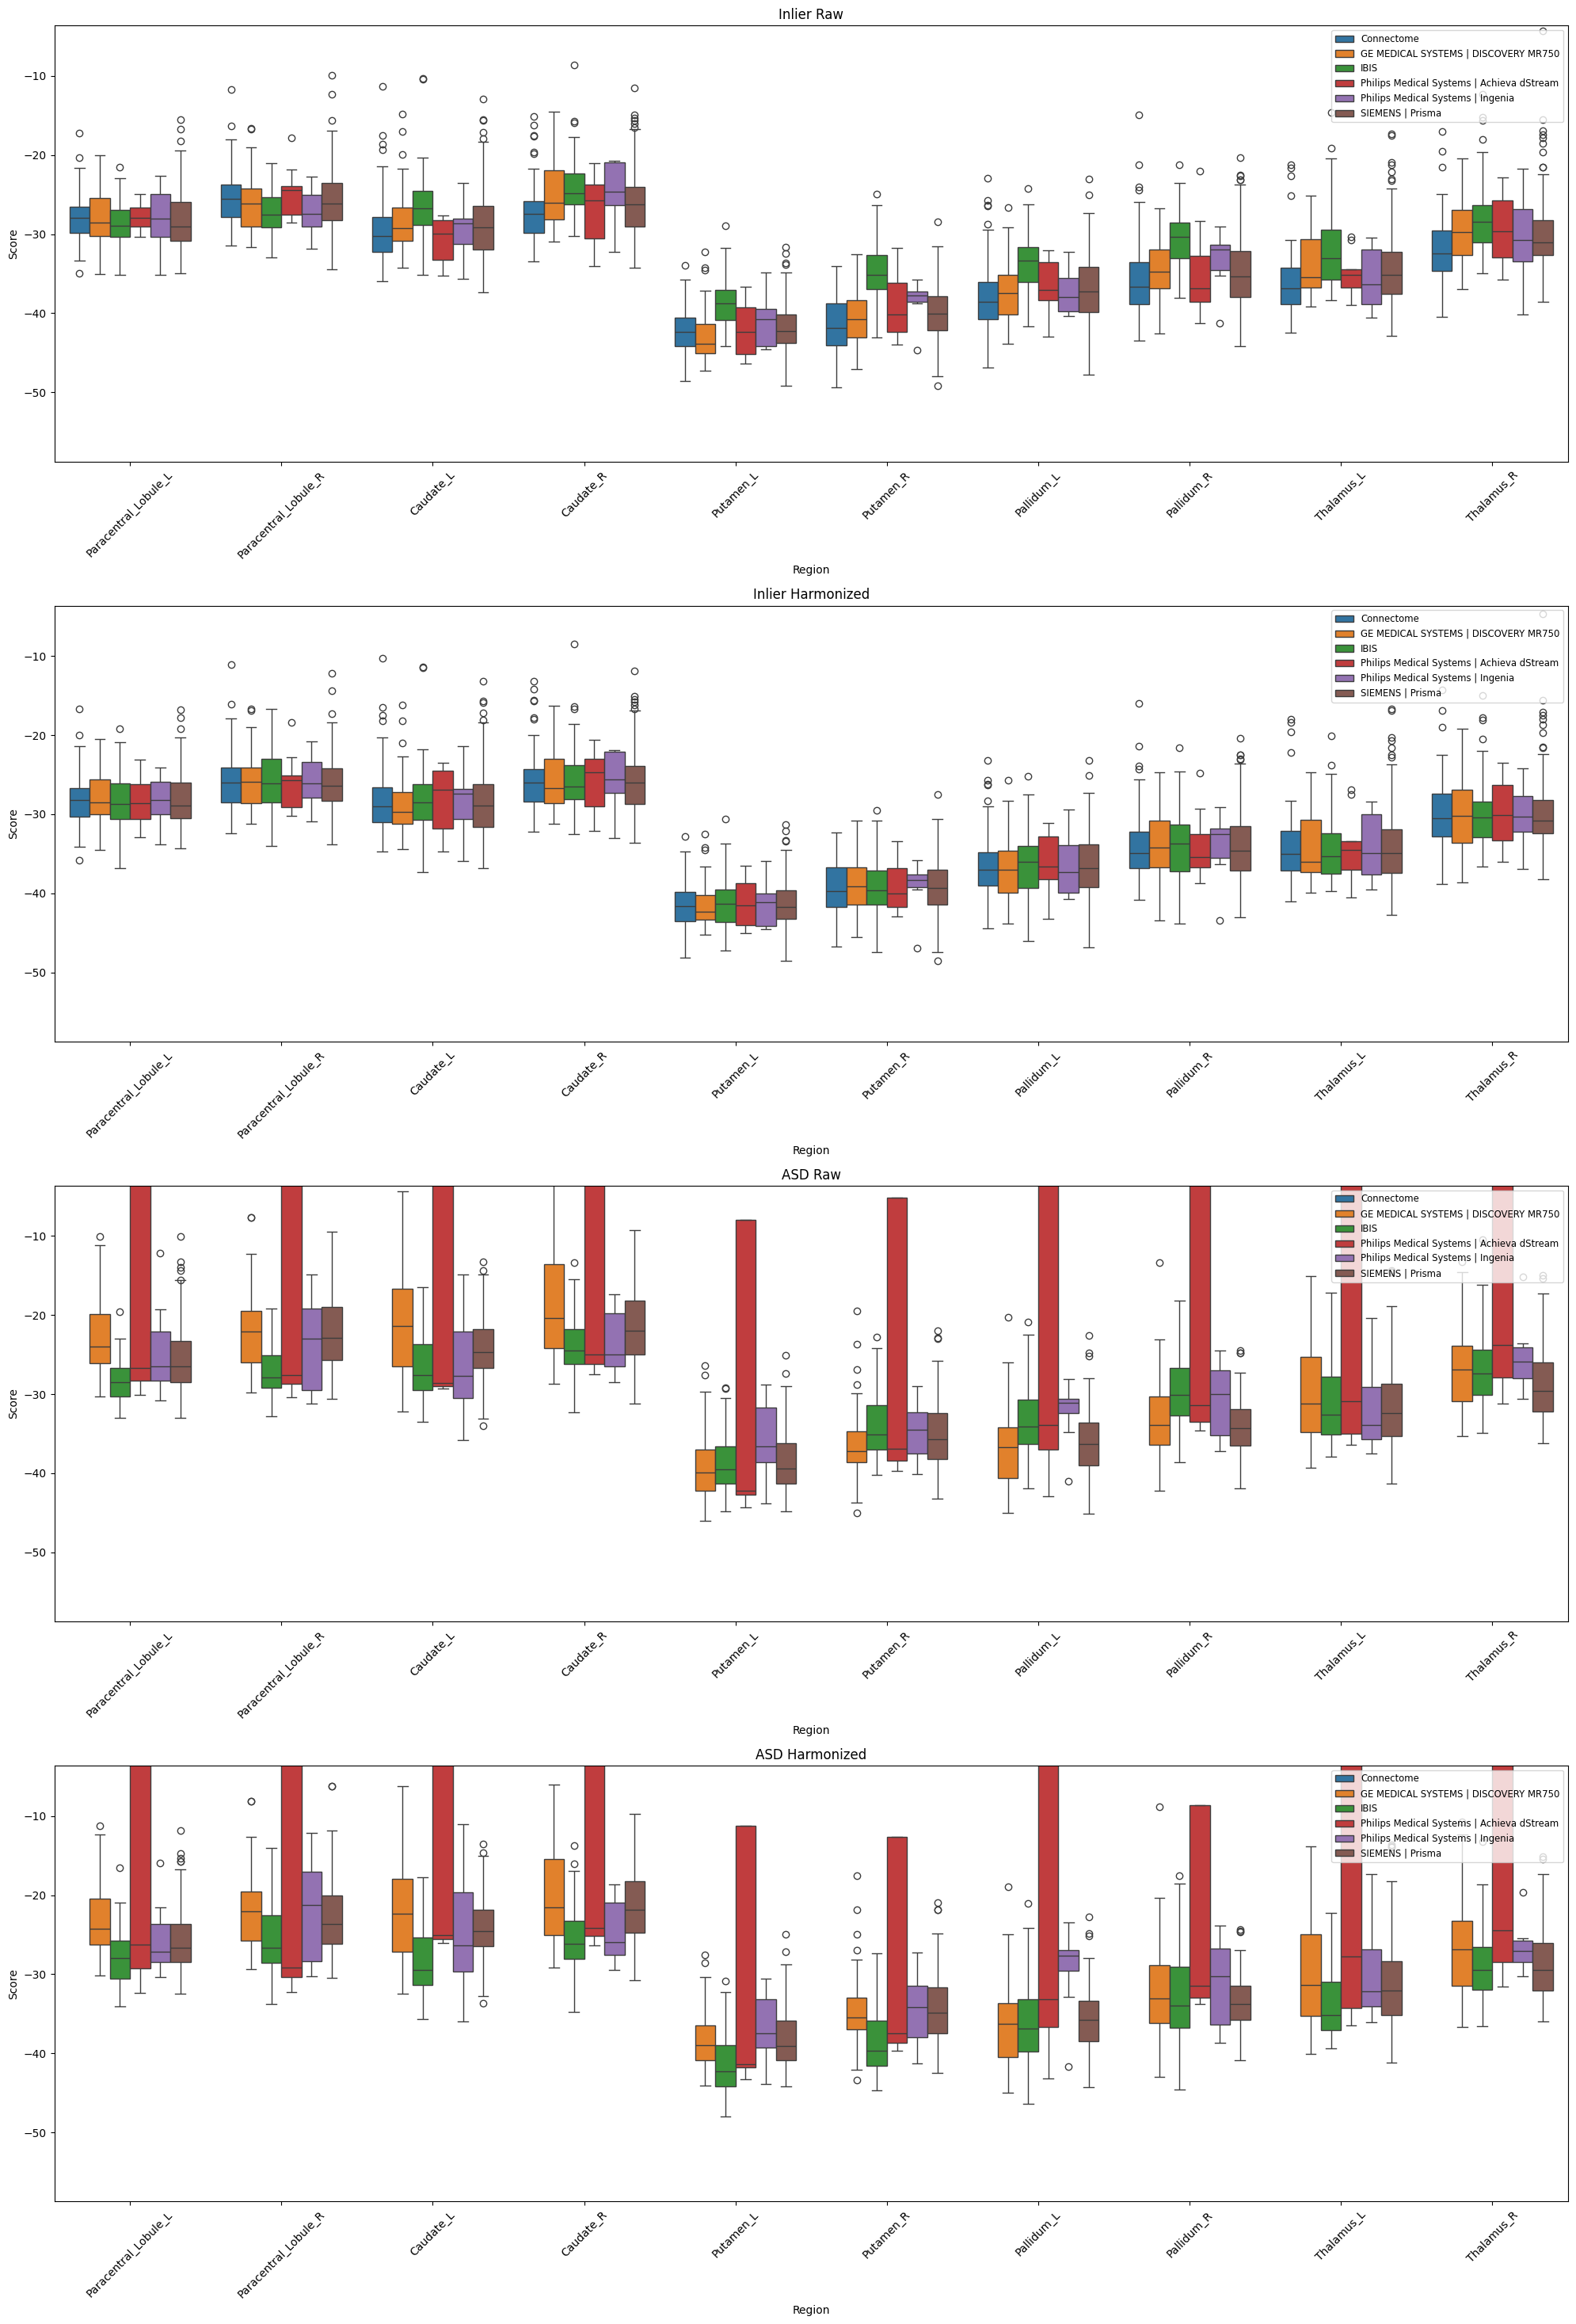

Regions 81–90


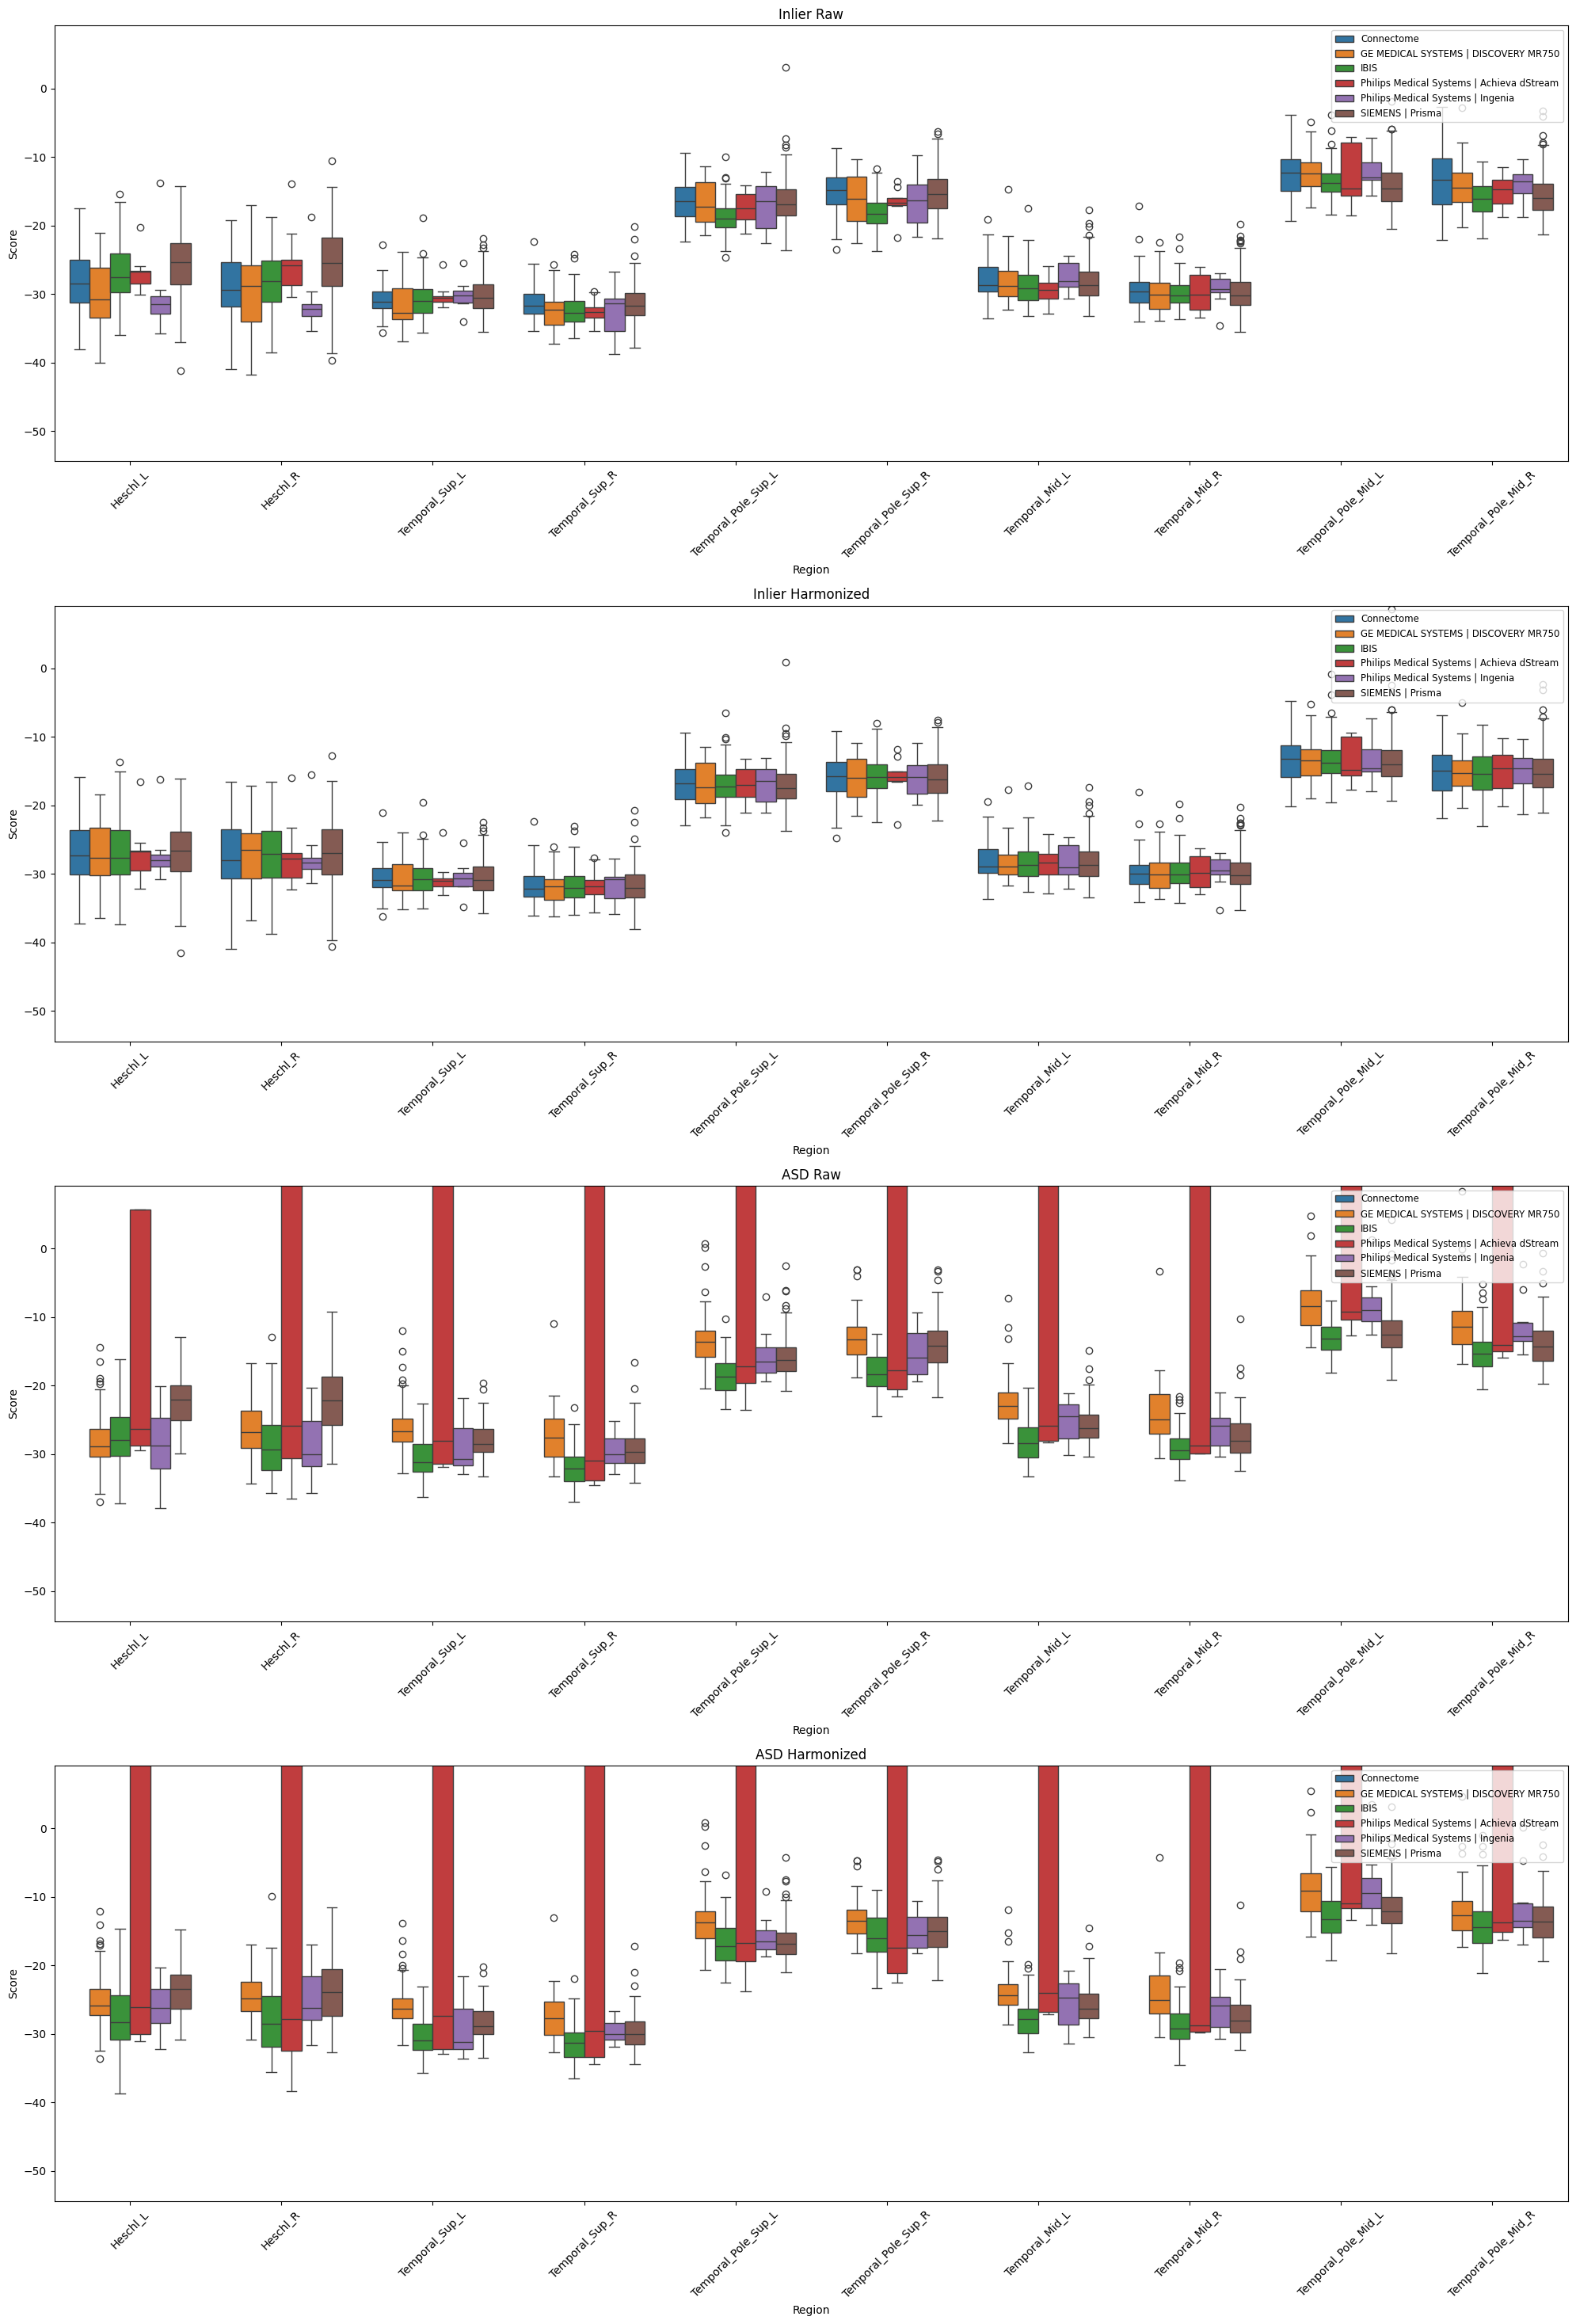

Regions 91–100


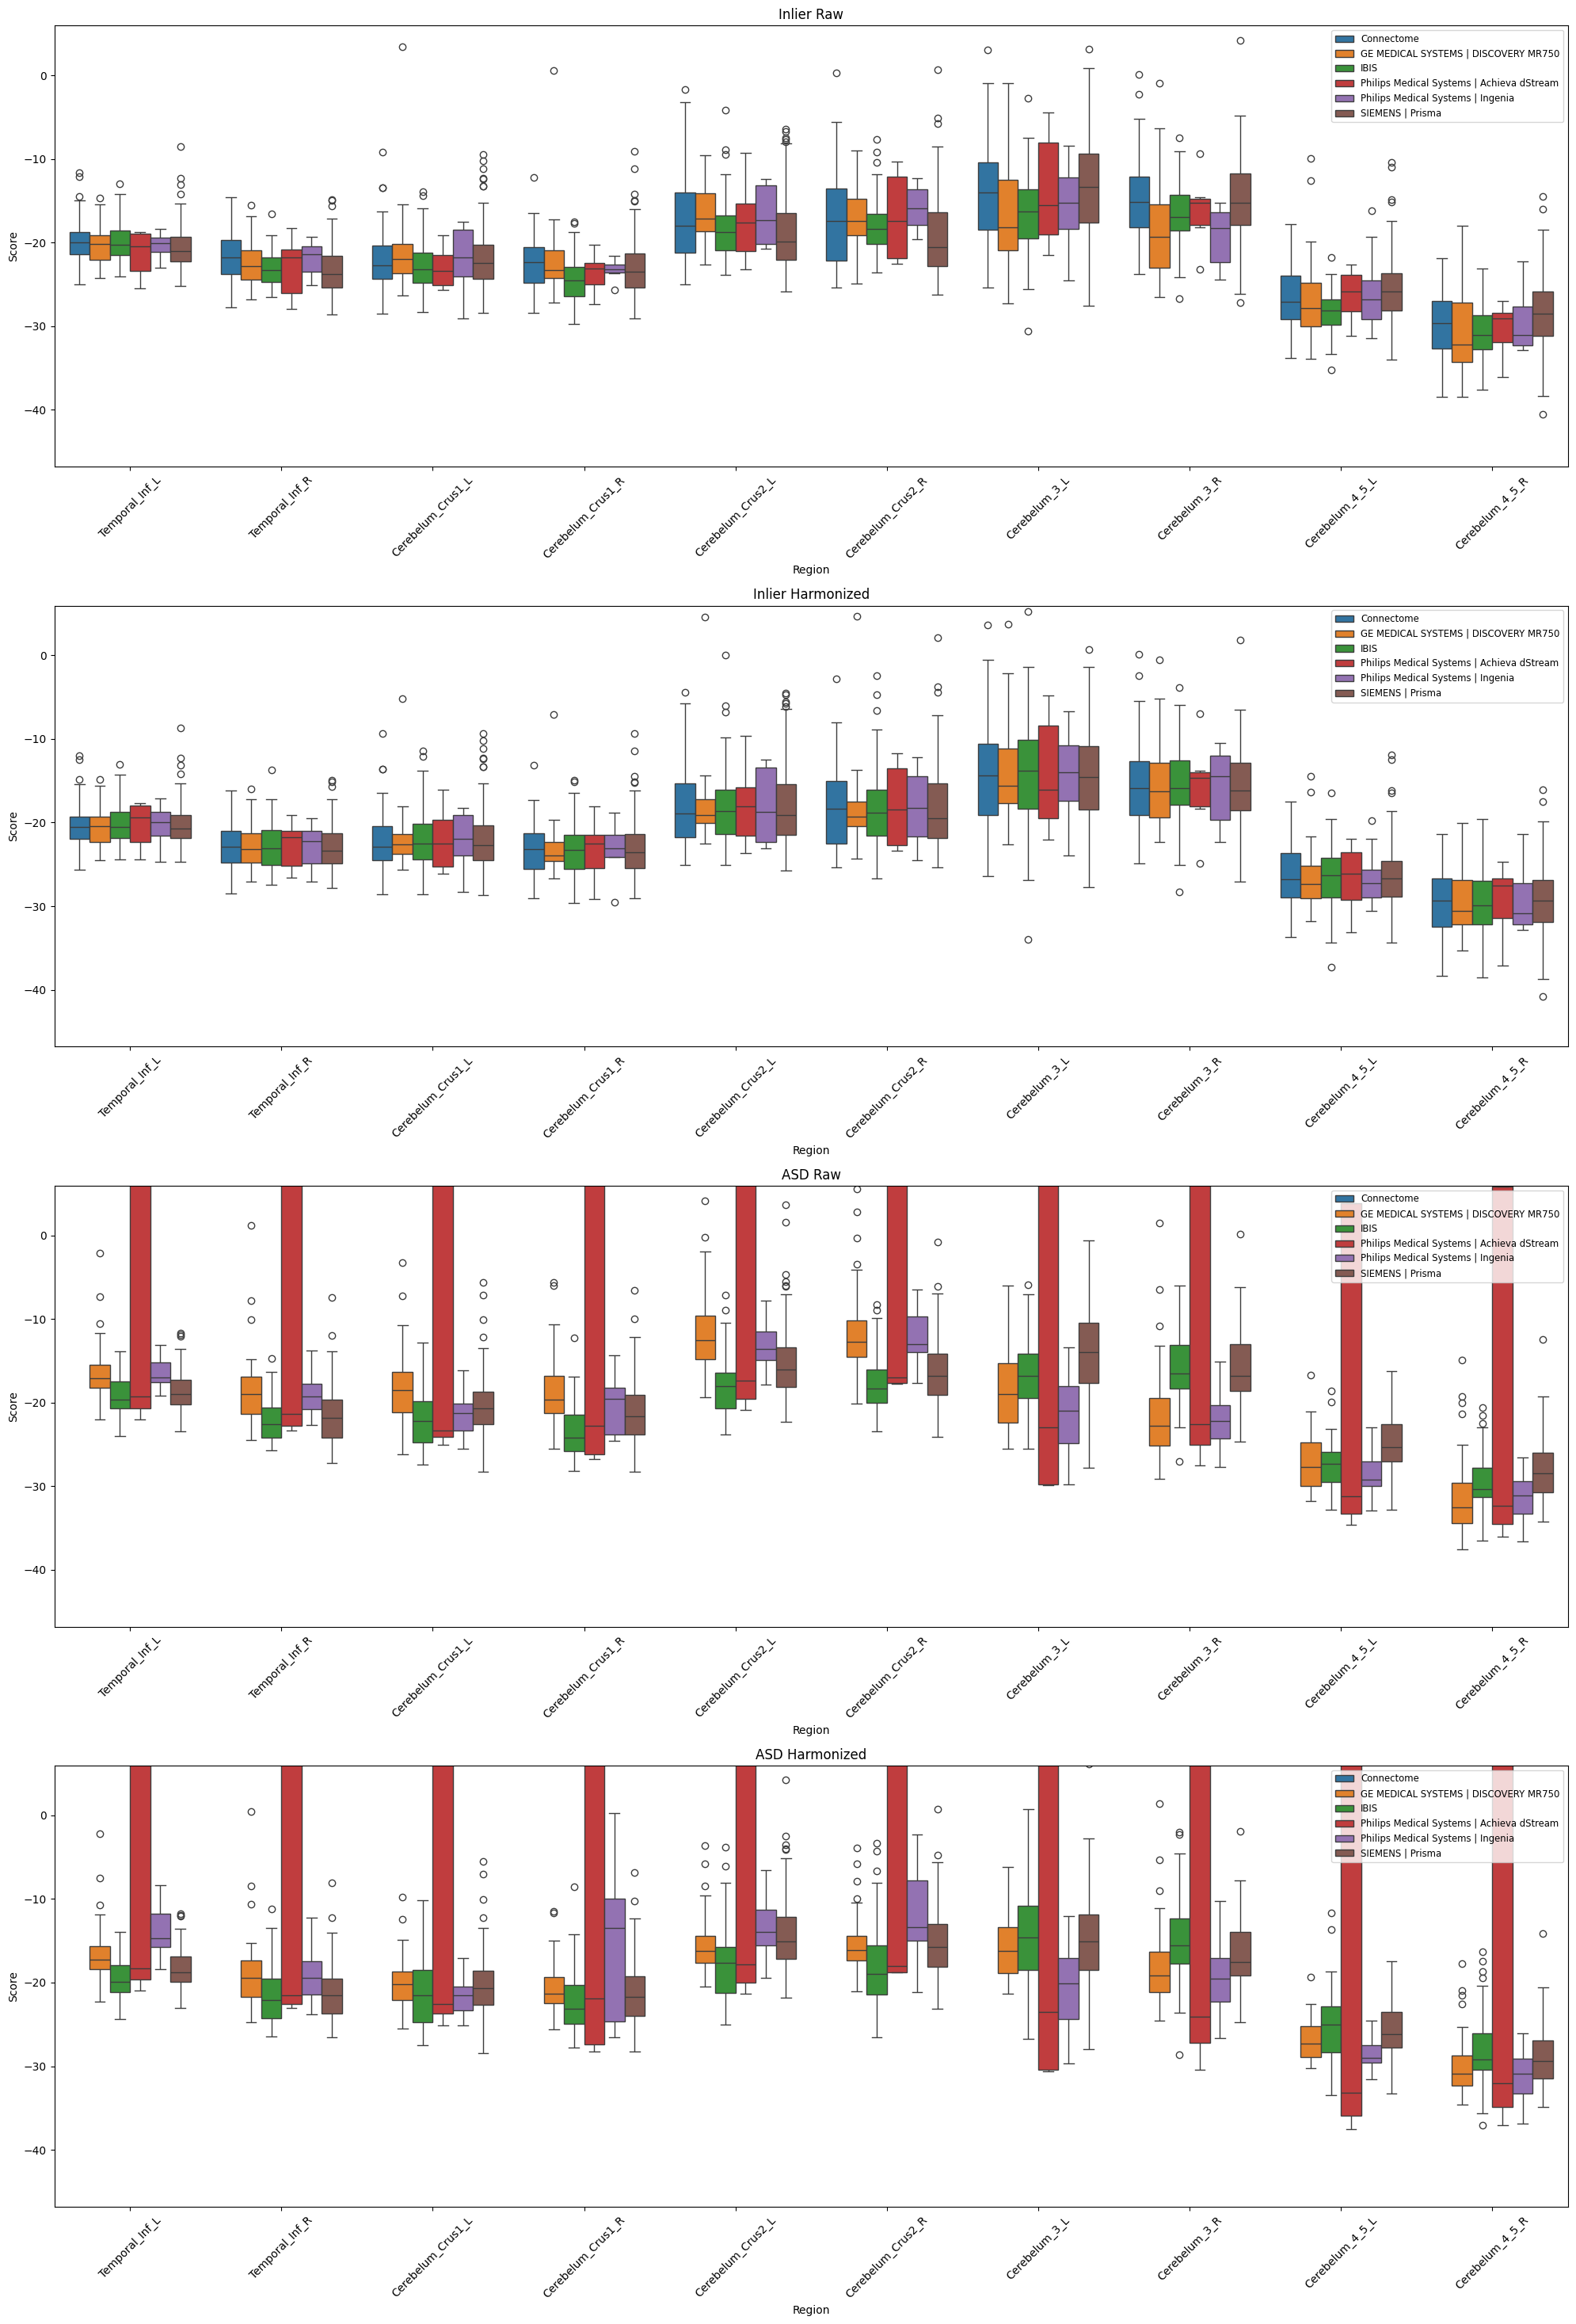

Regions 101–110


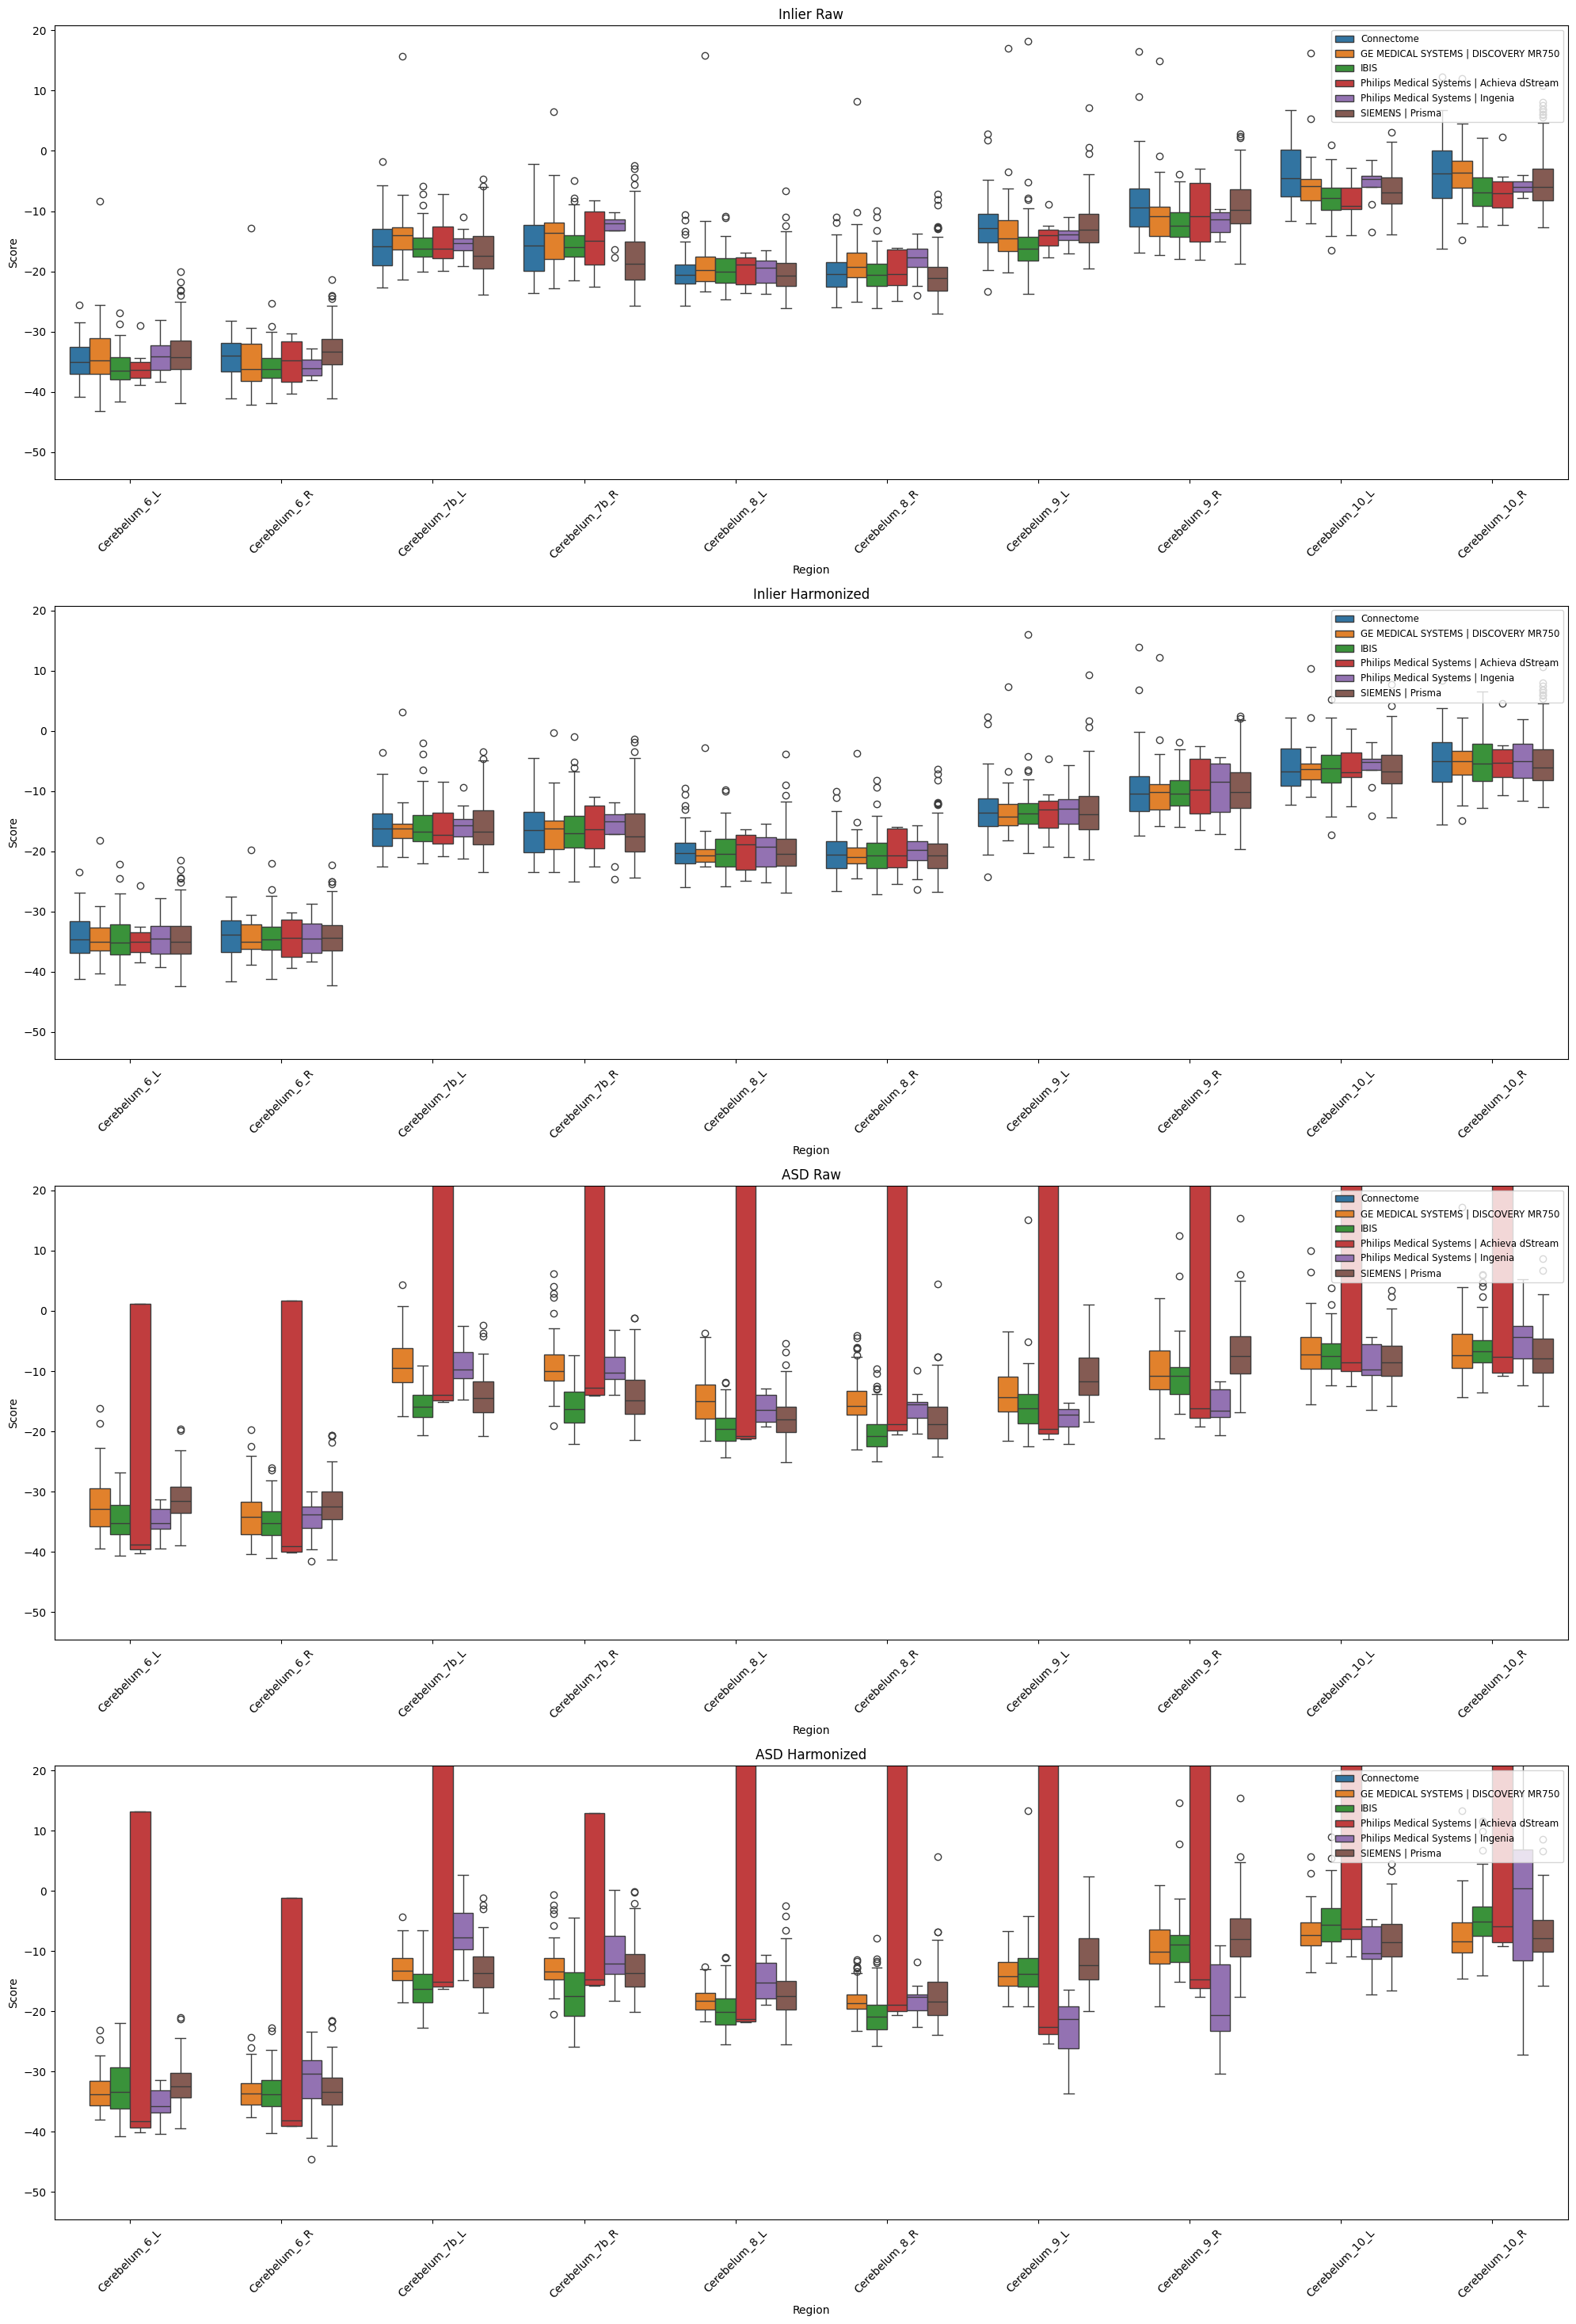

Regions 111–118


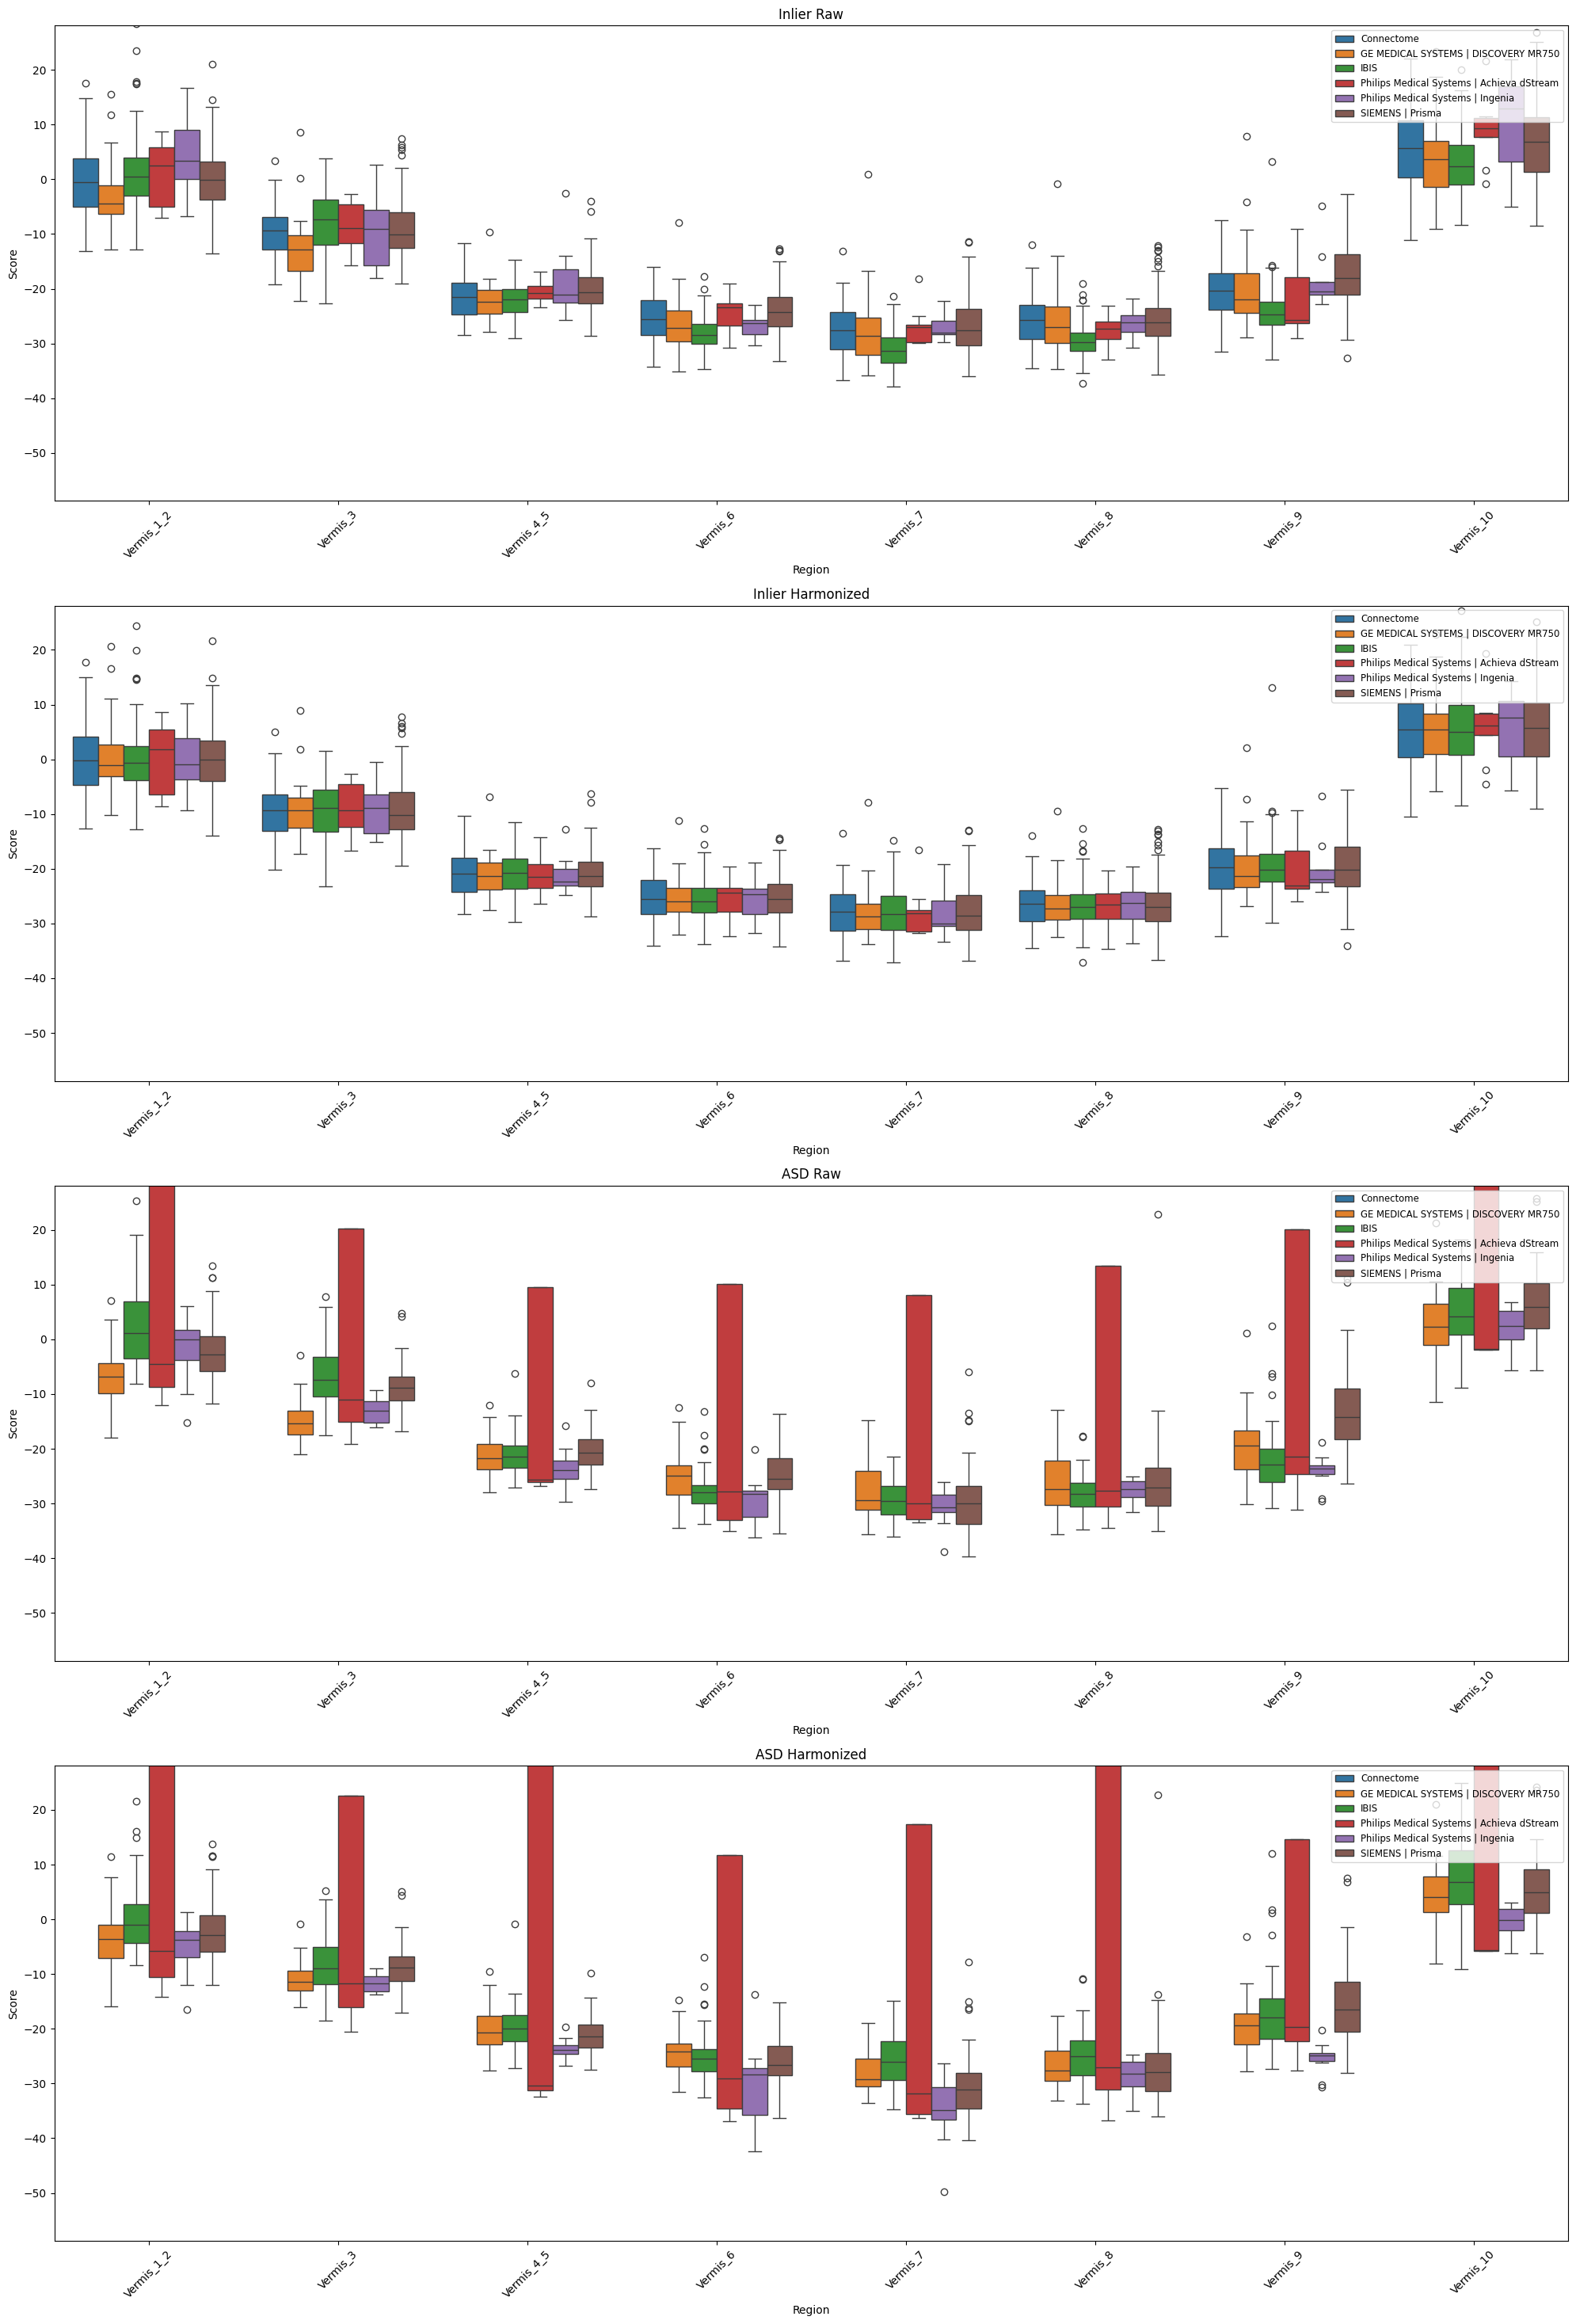

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define your fixed scanner order & palette
scanner_order = [
    'Connectome',
    'GE MEDICAL SYSTEMS | DISCOVERY MR750',
    'IBIS',
    'Philips Medical Systems | Achieva dStream',
    'Philips Medical Systems | Ingenia',
    'SIEMENS | Prisma'
]
base_palette = sns.color_palette("tab10", n_colors=len(scanner_order))
palette_dict = dict(zip(scanner_order, base_palette))

# 2. Identify your ROI columns (exclude Cohort, ID, and Scanner)
region_cols = [
    c for c in region_scores_raw.columns
    if c not in ('Cohort','ID','Scanner')
]
#  split into chunks of 10 (last chunk may be smaller)
chunks = [region_cols[i:i+10] for i in range(0, len(region_cols), 10)]

# 3. Define which cohorts you harmonized
inlier_cohorts = ['ABCD-Val-Test', 'IBIS-LR-Typical']
asd_cohorts    = ['ABCD-ASD',      'IBIS-ASD']

# 4. Ensure each DataFrame has a 'Scanner' column
for df in (region_scores_raw, harmonized_df):
    if 'Scanner' not in df.columns:
        df['Scanner'] = df['ID'].map(
            lambda uid: inlier_scanner_dict.get(uid,
                       asd_scanner_dict.get(uid, 'Unknown'))
        )

# 5. Pre-filter each of the four DataFrames
df_raw_inlier = region_scores_raw  [region_scores_raw  ['Cohort'].isin(inlier_cohorts)]
df_har_inlier = harmonized_df      [harmonized_df      ['Cohort'].isin(inlier_cohorts)]
df_raw_asd    = region_scores_raw  [region_scores_raw  ['Cohort'].isin(asd_cohorts)]
df_har_asd    = harmonized_df      [harmonized_df      ['Cohort'].isin(asd_cohorts)]

# 6. Helper to melt & boxplot onto a given Axes, with y-limits set later
def box_on_ax(df, ax, regs, title, ylims):
    plot_df = df[['Scanner'] + regs].melt(
        id_vars=['Scanner'],
        var_name='Region',
        value_name='Score'
    )
    sns.boxplot(
        data=plot_df,
        x='Region', y='Score',
        hue='Scanner',
        hue_order=scanner_order,
        palette=palette_dict,
        ax=ax
    )
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper right', fontsize='small')
    ax.set_ylim(ylims)

for idx, regs in enumerate(chunks, start=1):
    # compute ±3σ limits
    vals = np.concatenate([
        df_raw_inlier[regs].values.flatten(),
        df_har_inlier[regs].values.flatten(),
        df_raw_asd   [regs].values.flatten(),
        df_har_asd   [regs].values.flatten()
    ])
    μ, σ = np.nanmean(vals), np.nanstd(vals)
    ylims = (μ - 3*σ, μ + 3*σ)

    fig, axes = plt.subplots(4, 1, figsize=(20, 32), sharey=True)
    start = 10*(idx-1) + 1
    end   = min(10*idx, len(region_cols))
    print(f'Regions {start}–{end}')

    box_on_ax(df_raw_inlier, axes[0], regs, 'Inlier Raw',         ylims)
    box_on_ax(df_har_inlier, axes[1], regs, 'Inlier Harmonized',  ylims)
    box_on_ax(df_raw_asd,    axes[2], regs, 'ASD Raw',            ylims)
    box_on_ax(df_har_asd,    axes[3], regs, 'ASD Harmonized',     ylims)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()